In [6]:
from collections import Counter
import os
import matplotlib.pyplot as plt
import pickle
import xml.etree.cElementTree as ET
from prozhitotools import dump
import re
from bs4 import BeautifulSoup
import pandas as pd
from collections import defaultdict
# import spacy
# import ru_core_news_lg
# from spacy.lang.ru.examples import sentences
# import spacy
# import ru_core_news_lg
# from spacy.lang.ru.examples import sentences 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF
from nltk import word_tokenize
import string
import pymorphy2
import collections
import re
import requests
morph = pymorphy2.MorphAnalyzer()
extended_punctuation = string.punctuation + '—»«...--"''"'
from stop_words import get_stop_words
stoplist = (get_stop_words('ru') + get_stop_words('uk') + ['що', 'з', 'е', 'го', 'це', 'сей', 'свой', 'едва', 'самый', 'час', 'часы', 'ть', 'минута', 'метр', 'текст'] + 
            ['com', 'id', ' \n', 'i'])
# nlp = spacy.load("ru_core_news_lg")

In [5]:
#функция, которая убирает из текста буквы английского и фрнцузского алфавита, стопслова и пунктуацию и лемматизирует
def preprocess_text(some_text):
    some_text = re.sub(r'\[|\]|([0-9])|[a-zA-ZàâäôéèëêïîçùûüÿæœÀÂÄÔÉÈËÊÏÎŸÇÙÛÜÆŒ]', '', str(some_text))
    lemmatized_text = [morph.parse(word)[0].normal_form for word in word_tokenize(some_text.lower()) if
                       morph.parse(word)[0].normal_form not in stoplist and morph.parse(word)[0].normal_form not in 
                       extended_punctuation]
    return ' '.join(lemmatized_text)

In [7]:
with open('spacy_stalin_notes.pickle', 'rb') as f:
    spacy_stalin_notes = pickle.load(f)

In [3]:
#paper_corpus_lemmatized = {}
#for diaries, year in zip(diaries_for_years_text.values(), range(1928, 1954)):
#    years_diaries_dic[year] = [preprocess_text(diarie) for diarie in diaries]
#    print(year)

In [4]:
# #создаем словарь с публицистикой, где ключа - год, значение - список с содержанием статей
# papers_for_years = collections.defaultdict(list)
# for file_root, dirs, files in os.walk(r'C:\Users\kryuk\Desktop\учеба\asya'):
#     for file in files:
#         if file.endswith('.xhtml') or file.endswith('.xml'):
#             print(file)
#             tree = ET.parse(os.path.join(file_root, file))
#             root = tree.getroot()
#             for tag in root.iter('meta'): 
#                 if tag.attrib['name'] == 'created' or tag.attrib['name'] == 'date': 
#                     text = '\n'.join([child.text for child in list(root[1]) if child.text])
#                     papers_for_years[int(re.search(r'\d{4}', tag.attrib['content'])[0])].append(text) 

In [5]:
# for year in range(1921, 1925):
#     if year in papers_for_years:
#         print(year, '\n', papers_for_years[year])

In [14]:
years_diaries_clean_dic[1929][2]

'вторник . горестный ведать . вчера ч. вечер умереть сон ( сердечный удар ) ольга иван жиронкина . умереть тихо , сон , знать чувствовать приход смерть . ольга иван ! память вставать необыкновенный ... поезд мчаться , увозить впервые крым . высовываться навстречу ветер , хмурь степной сумеречный массив , откидываться видеть мирный картина , купе , ольга иван , прикорнуть ужин крышка чемодан , крестить рота . послеобеденный голубой дюльберовский пляж далёкий пустырь , « сапожников дача » ехидный выражение о. и. мелькнуть а.с. , прекрасно-бледный лицо , озариться улыбка какой-то невзначай пустячок ... уйти ! закончить « воспоминание » панаева . вечером зданевич шура городецкий . рад , прислать вовремя : мама собираться отъезд . зданевич поездка измениться хороший , , понять . рассматривать немецкий журнал , играть « викторин » , читать ответ вопрос разборка , мнение гость остроумно . / -го мама таня уехать москва .'

In [10]:
with open('years_diaries_clean_dic.pickle', 'rb') as f:
    years_diaries_clean_dic = pickle.load(f)

In [ ]:
papers_for_years1 = {year: [preprocess_text(note) for note in paper] for year, paper in paper_corpus_without_punct.items()
                     if year in range(1928, 1954)}

In [65]:
#записываем наш газетныф корпус в пикл
# import pickle
# with open('flat_prozhito_without_punkt.pickle', 'wb') as fw:
#     pickle.dump(flat_prozhito_without_punkt, fw, protocol=2)

In [15]:
# with open('flat_dict_papers.pickle', 'wb') as fw:
#     pickle.dump(flat_dict_papers, fw, protocol=2)

In [5]:
with open('paper_corpus_lemmatized.pickle', 'rb') as f:
    paper_corpus_lemmatized = pickle.load(f)

In [6]:
with open('paper_corpus_without_punct.pickle', 'rb') as f:
    paper_corpus_without_punct = pickle.load(f)

In [8]:
paper_corpus_without_punct[1929]

['нота заместитель народный комиссар иностранный дело ссср поверить дело китай ссср . июль сведение , получить правительство ссср , июль утром китайский власть произвести налёт китайско-восточный железный дорога захватить телеграф квжда линия , прервать телеграфный сообщение ссср , закрыть опечатать объяснение причина торговый представительство ссср , отделение госторг , текстильсиндикат , нефтссиндикат совторгфлот . дубанить дорога люй чжунхуан предъявить управлять квжда г. емшанов требование передать управление дорога лицо , назначить дубанемой ... одновременно получить сведение сосредоточение вдоль советский граница маньчжурский войско , привести боевой готовность пододвинуть граница . сведение , вместе маньчжурский войско граница ссср расположить русский белогвардейский отряд , маньчжурский командование намерить перебросить советский территория . ... оставаться верный мирный политика , союзный правительство , несмотря насильственный провокационный действие китайский власть , изъявл

In [ ]:
paper_corpus_without_punct_1928 = [[word for word in paper if word not in extended_punctuation] for paper in paper_corpus_without_punct[1928]]

In [10]:
papers_for_years_without_punkt = {year: [[word for word in paper if word not in extended_punctuation] for paper 
                                 in papers] for year, papers in paper_corpus_without_punct.items()}

In [11]:
#уплощаем структуру словая, чтобы по значениям лежал весь мешок слов всех записей в списке
flat_dict_papers = {year: [note for paper in papers for note in paper] for year, papers in 
                    papers_for_years_without_punkt.items()}

In [14]:
flat_dict_papers[1929]

['нота',
 'заместитель',
 'народный',
 'комиссар',
 'иностранный',
 'дело',
 'ссср',
 'поверить',
 'дело',
 'китай',
 'ссср',
 'июль',
 'сведение',
 'получить',
 'правительство',
 'ссср',
 'июль',
 'утром',
 'китайский',
 'власть',
 'произвести',
 'налёт',
 'китайско-восточный',
 'железный',
 'дорога',
 'захватить',
 'телеграф',
 'квжда',
 'линия',
 'прервать',
 'телеграфный',
 'сообщение',
 'ссср',
 'закрыть',
 'опечатать',
 'объяснение',
 'причина',
 'торговый',
 'представительство',
 'ссср',
 'отделение',
 'госторг',
 'текстильсиндикат',
 'нефтссиндикат',
 'совторгфлот',
 'дубанить',
 'дорога',
 'люй',
 'чжунхуан',
 'предъявить',
 'управлять',
 'квжда',
 'г.',
 'емшанов',
 'требование',
 'передать',
 'управление',
 'дорога',
 'лицо',
 'назначить',
 'дубанемой',
 'одновременно',
 'получить',
 'сведение',
 'сосредоточение',
 'вдоль',
 'советский',
 'граница',
 'маньчжурский',
 'войско',
 'привести',
 'боевой',
 'готовность',
 'пододвинуть',
 'граница',
 'сведение',
 'вместе',
 'маньчж

In [9]:
#то же делаем с корпусом дневников
[[token.text for token in nlp(flat_prozhito_without_punkt[key], 
                                                                           disable = ['ner', 'parser']) 
                                               if token.text not in extended_punctuation]]
flat_prozhito_list = {year: ' '.join([' '.join(diary) for diary in diaries]) for year, diaries in years_diaries_clean_dic.items()}

In [16]:
flat_prozhito_list = {year: [[token.text for token in nlp(diary)] for diary in diaries] 
                      for year, diaries in years_diaries_clean_dic.items()}

MemoryError: Unable to allocate 1.49 MiB for an array with shape (457, 855) and data type float32

In [10]:
flat_prozhito_without_punkt = {year: ''.join([letter for letter in string if letter not in extended_punctuation]) 
                               for year, string in years_diaries_clean_dic.items()}

In [10]:
def get_topics(model, feature_names, no_top_words):
    '''
    берет модель топик-моделинга, слова и количество топиков, возврашает темы
    '''
    with open('topic_paper_for_1935.txt', 'w', encoding='utf-8') as f:
        for topic_idx, topic in enumerate(model.components_):
            print(f"Тема {topic_idx+1}:", file=f)
            topic_words = ", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
            print(topic_words, file=f)

In [11]:
def main():
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=5, ngram_range=(2, 2), stop_words=stoplist)
    tfidf = tfidf_vectorizer.fit_transform(paper_corpus_lemmatized[1935])
    tfidf_feature_names = tfidf_vectorizer.get_feature_names()
    nmf = NMF(n_components=10, random_state=42, alpha=.1, l1_ratio=.5, init='nndsvd', max_iter=100000).fit(tfidf)
    get_topics(nmf, tfidf_feature_names, 10)

In [ ]:
if __name__ == '__main__':
    main()#nndsvd

In [16]:
import nltk
from nltk.collocations import *

In [ ]:
#ключевые слова по degree centrality, решил не использовать
import networkx as nx
def get_keywords_graph_degree_centrality(text, num_keywords):
    """
    берет текст в виде списка слов и количество ключевых слов для извлечения,
    возвращает в качестве ключевых слов узлы графа с самой высокой степенью degree centrality
    """
    G = nx.Graph()
    G.add_edges_from([(text[i], text[i+1]) for i, item in enumerate(text) if i != (len(text)-1)])
    dc = nx.degree_centrality(G)
    keywords = [node for node in sorted(dc, key=dc.get, reverse=True)[:num_keywords]]
    return keywords

In [ ]:
def get_keywords_bigrams_tf_idf(texts, num_keywords):
    """
    берет список не лемматизированных текстов в виде строк
    и количество ключевых слов для извлечения,
    возвращает в качестве ключевых слов слова и биграммы, 
    отобранные методом TF-IDF
    """
    keywords = []
    make_tf_idf = TfidfVectorizer(stop_words=rus_stop_words, ngram_range=(1, 2))
    texts_as_tfidf_vectors = make_tf_idf.fit_transform(get_preprocessed_text(text) for text in texts)
    id2word = {i : word for i, word in enumerate(make_tf_idf.get_feature_names())} 
    for text_row in range(texts_as_tfidf_vectors.shape[0]): 
        row_data = texts_as_tfidf_vectors.getrow(text_row) 
        words_for_this_text = row_data.toarray().argsort() 
        top_words_for_this_text = words_for_this_text [0, : -(num_keywords + 1) : -1] 
        keywords_for_this_text = [id2word[w] for w in top_words_for_this_text]
        keywords.append(keywords_for_this_text)
    return keywords

In [ ]:
for text_keywords in get_keywords_bigrams_tf_idf(texts, 10):
    print(text_keywords)

In [5]:
# word_fd = nltk.FreqDist(flat_dict_papers[1930])
bigram_fd = nltk.FreqDist(nltk.bigrams(flat_dict_papers[1930]))
# tokens = nltk.wordpunct_tokenize(text)
finder = BigramCollocationFinder(word_fd, bigram_fd)
# sorted(finder.ngram_fd.items(), key=lambda t: (-t[1], t[0]))[:10]

NameError: name 'flat_dict_papers' is not defined

In [ ]:
len(flat_prozhito[1930])

In [ ]:
type(flat_prozhito[1930])

In [17]:
#функций, которая выдаёт самые частотные коллокации по убыванию
def collocater(text, number):
    tokens = nltk.wordpunct_tokenize(text)
    tokens_without_punkt = [token for token in tokens if token not in extended_punctuation and stoplist]
    word_prozhito = nltk.FreqDist(tokens_without_punkt)
    bigram_prozhito = nltk.FreqDist(nltk.bigrams(tokens_without_punkt))
    finder_prozhito = BigramCollocationFinder(word_prozhito, bigram_prozhito)
    finder_prozhito.apply_word_filter(lambda w: len(w) < 3 or w.lower() in stoplist)
    finder_prozhito = sorted(finder_prozhito.ngram_fd.items(), key=lambda t: (-t[1], t[0]))
    finder_prozhito = finder_prozhito[:number]
    return finder_prozhito

In [11]:
flat_prozhito_without_punkt[1930][1]

'н'

In [ ]:
with open('colloca_for_years_prozhito100.txt', 'w', encoding='utf-8') as f:
     print(*[year[:100] for year in colloc_for_years_prozhito], file=f)

In [27]:
colloc_for_years_prozhito[1]

IndexError: list index out of range

In [13]:
colloc_for_years_prozhito = []
for key, value in flat_prozhito_without_punkt.items():
    colloc_for_years_prozhito.append('\n' + str(key) + '\n')
    colloc_for_years_prozhito.append(collocater(flat_prozhito_without_punkt[key]))
# with open('colloca_for_years_prozhito50.txt', 'w', encoding='utf-8') as f:
#     print(*colloc_for_years, file=f)

In [31]:
colloc_for_years_prozhito_100 = {}
for key, value in flat_prozhito_without_punkt.items():
    colloc_for_years_prozhito_100[key] = collocater(flat_prozhito_without_punkt[key], 100)
# with open('colloca_for_years_prozhito50.txt', 'w', encoding='utf-8') as f:
#     print(*colloc_for_years, file=f)

In [1]:
colloc_for_years_prozhito_100[1929]

NameError: name 'colloc_for_years_prozhito_100' is not defined

In [32]:
colloc_for_years_prozhito_100[1929]

[(('друг', 'друг'), 82),
 (('оружейный', 'палата'), 63),
 (('блудный', 'сын'), 61),
 (('академия', 'наука'), 59),
 (('рубль', 'копа'), 45),
 (('прогулка', 'леночка'), 43),
 (('клодить', 'ходить'), 42),
 (('получить', 'письмо'), 42),
 (('конец', 'конец'), 41),
 (('минут', 'минут'), 41),
 (('советский', 'власть'), 41),
 (('охотный', 'ряд'), 39),
 (('исторический', 'музей'), 37),
 (('главное', 'образ'), 36),
 (('пить', 'чаять'), 34),
 (('вознесенский', 'монастырь'), 33),
 (('воскресение', 'утром'), 33),
 (('всякий', 'случай'), 32),
 (('вчера', 'вечером'), 32),
 (('родовой', 'знак'), 30),
 (('ряд', 'купить'), 29),
 (('точка', 'зрение'), 29),
 (('погода', 'тёплый'), 28),
 (('вернуться', 'домой'), 27),
 (('обед', 'пришлый'), 26),
 (('стальной', 'скок'), 26),
 (('обращать', 'внимание'), 25),
 (('погода', 'жаркий'), 25),
 (('прийти', 'домой'), 25),
 (('журавлиный', 'родина'), 24),
 (('музей', 'рерих'), 24),
 (('письмо', 'васа'), 24),
 (('татьяна', 'дмитрий'), 24),
 (('текущий', 'дело'), 24),
 

In [21]:
for key, value in flat_dict_papers.items():
    colloc_for_years_papers.append('\n' + str(key) + '\n')
    colloc_for_years_papers.append(collocater(' '.join(flat_dict_papers[key]), 50))

NameError: name 'flat_dict_papers' is not defined

In [17]:
colloc_for_years_prozhito

['\n1928\n',
 [(('лечь', 'спать'), 90),
  (('утром', 'ходить'), 87),
  (('клодить', 'ходить'), 81),
  (('оружейный', 'палата'), 76),
  (('друг', 'друг'), 74),
  (('попить', 'чай'), 73),
  (('охотный', 'ряд'), 72),
  (('пить', 'чаять'), 68),
  (('рубль', 'копа'), 55),
  (('воскресение', 'утром'), 51),
  (('мюр', 'купить'), 51),
  (('главное', 'образ'), 49),
  (('конец', 'конец'), 49),
  (('вечером', 'ходить'), 44),
  (('утром', 'встать'), 43),
  (('послать', 'домой'), 42),
  (('приехать', 'домой'), 42),
  (('ряд', 'купить'), 42),
  (('академия', 'наука'), 41),
  (('минут', 'минут'), 41),
  (('получить', 'письмо'), 41),
  (('пришлый', 'домой'), 41),
  (('письмо', 'васа'), 40),
  (('базар', 'купить'), 39),
  (('писать', 'дневник'), 39),
  (('исторический', 'музей'), 37),
  (('работать', 'мастерский'), 37),
  (('поехать', 'домой'), 36),
  (('точка', 'зрение'), 36),
  (('вернуться', 'домой'), 35),
  (('пошлый', 'домой'), 35),
  (('идти', 'дождь'), 34),
  (('алма', 'ата'), 33),
  (('корона',

In [ ]:
sorted(finder_prozhito.ngram_fd.items(), key=lambda t: (-t[1], t[0]))[:30]

In [ ]:
flat_prozhito[1930][1]

In [8]:
with open('years_diaries_clean_dic.pickle', 'rb') as f:
    years_diaries_clean_dic = pickle.load(f)

In [84]:
years_diaries_clean_dic[1937][1]

'т'

In [ ]:
sorted(finder.ngram_fd.items(), key=lambda t: (-t[1], t[0]))[:10]

In [ ]:
#1942 - всего 3 записи, не делает моделирование, 1935 тоже - 1
len(flat_dict_papers)

In [ ]:
for year, papers in flat_dict_papers.items():
    with open(f'Newspaper_for_{year}.txt', 'w', encoding='utf-8') as f:
        print(*papers, file=f)

In [20]:
colloc_for_years_papers_all = []
for key, value in flat_dict_papers.items():
    colloc_for_years_papers_all.append('\n' + str(key) + '\n')
    colloc_for_years_papers_all.append(collocater(' '.join(flat_dict_papers[key]), 200))
with open('colloc_for_years_papers200.txt', 'w', encoding='utf-8') as f:
    print(*colloc_for_years_papers_all, file=f)

In [49]:
def collocater_trigram(text, number):
    tokens = nltk.wordpunct_tokenize(text)
    tokens_without_punkt = [token for token in tokens if token not in extended_punctuation and stoplist]
    finder = TrigramCollocationFinder.from_words(tokens_without_punkt)
    finder.apply_word_filter(lambda w: len(w) < 3 or w.lower() in stoplist)
    finder = sorted(finder.ngram_fd.items(), key=lambda t: (-t[1], t[0]))
    finder = finder[:number]
    return finder

In [50]:
trigrams_for_years_all = []
for key, value in flat_dict_papers.items():
    trigrams_for_years_all.append('\n' + str(key) + '\n')
    trigrams_for_years_all.append(collocater_trigram(' '.join(flat_dict_papers[key]), 50))
with open('trigrams_for_years_papers50.txt', 'w', encoding='utf-8') as f:
    print(*trigrams_for_years_all, file=f)

In [ ]:
.most_common(50
             ()sorted(Counter(), key=lambda x: x[1])

In [35]:
freq_word_papers = {year: Counter(paper).most_common(200) for year, paper in flat_dict_papers.items()}

In [38]:
with open('freq_word_papers200.txt', 'w', encoding='utf-8') as fw:
    print(freq_word_papers, file=fw)

In [39]:
freq_word_papers[1929]

[('работа', 709),
 ('должный', 444),
 ('приёмник', 435),
 ('станция', 381),
 ('ток', 378),
 ('одр', 376),
 ('организация', 364),
 ('сопротивление', 340),
 ('волна', 339),
 ('большой', 287),
 ('лампа', 251),
 ('вопрос', 243),
 ('напряжение', 243),
 ('катушка', 237),
 ('часть', 223),
 ('антенна', 219),
 ('приём', 216),
 ('радио', 214),
 ('связь', 213),
 ('мм', 207),
 ('необходимый', 200),
 ('случай', 199),
 ('радиолюбитель', 196),
 ('схема', 195),
 ('сторона', 189),
 ('давать', 189),
 ('курс', 177),
 ('сеть', 177),
 ('дать', 174),
 ('план', 170),
 ('конец', 168),
 ('установка', 167),
 ('вольт', 165),
 ('конденсатор', 165),
 ('г.', 163),
 ('передача', 162),
 ('сила', 160),
 ('дело', 159),
 ('хороший', 155),
 ('радиофикация', 155),
 ('являться', 154),
 ('передатчик', 154),
 ('место', 153),
 ('прибор', 152),
 ('электрический', 150),
 ('коротковолновый', 149),
 ('рабочий', 148),
 ('работать', 145),
 ('задача', 143),
 ('линия', 140),
 ('новый', 139),
 ('провод', 137),
 ('ячейка', 136),
 ('рис

In [ ]:
экселевская таббличка и колво упоминаний
какие события самые значимые
сравнивать с каноническим школьным учебником


Длинна корпуса НКРЯ без стопслов - почти 15 миллионов знаков

In [105]:
sum([len(' '.join(flat_dict_papers[key])) for key in flat_dict_papers.keys()])

14858971

In [107]:
sum([len(flat_prozhito_without_punkt[key]) for key in flat_prozhito_without_punkt.keys()])

101103723

Длина корпуса прожито - около 100 миллионов знаков

In [103]:
sum([len(' '.join(flat_dict_papers[key])) for key in flat_dict_papers.keys()])

14858971

In [ ]:
' '.join(flat_dict_papers[key]

In [ ]:
type(flat_dict_papers[1928][1])

In [ ]:
authors_nkrya = []
date = None
author_nkrya = None
for file_root, dirs, files in os.walk('.'):
    for file in files:
        if file.endswith('.xhtml') or file.endswith('.xml'):
            tree = ET.parse(os.path.join(file_root, file))
            root = tree.getroot()
            for tag in root.iter('meta'):
                if tag.attrib['name'] in {'date', 'publ_year', 'created'}:
                    year = re.search(r'\d{4}', tag.attrib['content'])
                    if year:
                        if int(year[0]) in range(1928, 1954):
                            date = int(year[0])
                elif tag.attrib['name'] == 'author':
                    author_nkrya = tag.attrib['content']
            if date and author_nkrya:
                authors_nkrya.append(author_nkrya)
            date = None
            author_nkrya = None

In [85]:
sum(list(bigram_for_years_prozhito.values()))

27

In [ ]:
sorted(dict(Counter(authors_nkrya)).items(), key=lambda x: x[1], reverse=True)

In [20]:
max([len(flat_prozhito_without_punkt[key]) for key in flat_prozhito_without_punkt])

15536589

In [21]:
nlp.max_length = 15536589

In [ ]:
flat_prozhito_tokens_without_punkt[1937] = 

In [22]:
flat_prozhito_tokens_without_punkt = {}
for key, value in flat_prozhito_without_punkt.items():
    flat_prozhito_tokens_without_punkt[key] = [[token.text for token in nlp(flat_prozhito_without_punkt[key], 
                                                                           disable = ['ner', 'parser']) 
                                               if token.text not in extended_punctuation]]

MemoryError: Unable to allocate 538. MiB for an array with shape (490105, 288) and data type float32

In [75]:
len(flat_prozhito_without_punkt[1937])

4164520

In [27]:
len(flat_prozhito_without_punkt[1937])

4164520

In [ ]:
sum((bigram_for_years_prozhito.values()))

In [34]:
len(' '.join(flat_dict_papers[1935]))

2235

In [6]:
with open('flat_prozhito_without_punkt.pickle', 'rb') as f:
    flat_prozhito_without_punkt = pickle.load(f)

In [8]:
flat_prozhito_without_punkt[1929]

"ночь январь . « новый » ! последний ? конец конец , ранний , поздний , совершенно неизбежно . интересный , пожалуй , « смерть послать судьбина » ? . всё-таки , приятный , « созерцать , солнце пурпурный погружаться лазурный » ... ( . бальмонт . ) наступить « настоящий социализм » : карточка стандартный хлеб , становиться несъедобный , пустой кооператив , придушить частник , голод , холод , всякий налог , отсутствие одежда , обувь товар вообще ... социализм . личный « социализм » наступить ранний . распоряжение смольный кугель уволить , распоряжение чагин — печатать . колесо судьба поворачиваться градус ... что-то начинать , изобретать т. д. наладиться работа , ахти , , как—пожаловать бриться ! новый начинаться по-новому . приезд ташкент , прожить — . отрез — измеряться вообще . начать что-нибудь новое новый место , например , париж , вена , флоренция , равно , ! готовый одобрять издалёка « опыт построение социализм » , немой участвовать , жертва . годик-подышать вольный воздух настоящи

In [74]:
with open('flat_dict_papers.pickle', 'rb') as f:
    flat_dict_papers = pickle.load(f)

In [9]:
flat_dict_papers[1929]

['нота',
 'заместитель',
 'народный',
 'комиссар',
 'иностранный',
 'дело',
 'ссср',
 'поверить',
 'дело',
 'китай',
 'ссср',
 'июль',
 'сведение',
 'получить',
 'правительство',
 'ссср',
 'июль',
 'утром',
 'китайский',
 'власть',
 'произвести',
 'налёт',
 'китайско-восточный',
 'железный',
 'дорога',
 'захватить',
 'телеграф',
 'квжда',
 'линия',
 'прервать',
 'телеграфный',
 'сообщение',
 'ссср',
 'закрыть',
 'опечатать',
 'объяснение',
 'причина',
 'торговый',
 'представительство',
 'ссср',
 'отделение',
 'госторг',
 'текстильсиндикат',
 'нефтссиндикат',
 'совторгфлот',
 'дубанить',
 'дорога',
 'люй',
 'чжунхуан',
 'предъявить',
 'управлять',
 'квжда',
 'г.',
 'емшанов',
 'требование',
 'передать',
 'управление',
 'дорога',
 'лицо',
 'назначить',
 'дубанемой',
 'одновременно',
 'получить',
 'сведение',
 'сосредоточение',
 'вдоль',
 'советский',
 'граница',
 'маньчжурский',
 'войско',
 'привести',
 'боевой',
 'готовность',
 'пододвинуть',
 'граница',
 'сведение',
 'вместе',
 'маньчж

In [79]:
with open('flat_prozhito_without_punkt.pickle', 'rb') as f:
    flat_prozhito_without_punkt = pickle.load(f)

In [80]:
bigram = 'троцки'
bigram_for_years_prozhito_per_million = {}
for key, value in flat_prozhito_without_punkt.items():
    bigram_for_years_prozhito_per_million[key] = (flat_prozhito_without_punkt[key].count(bigram) 
                                                  / len(flat_prozhito_without_punkt[key])) * 1000000
print(bigram_for_years_prozhito_per_million)

{1928: 24.78148662393082, 1929: 42.141601047218785, 1930: 24.90545967846248, 1931: 14.452997407132266, 1932: 22.29610471495208, 1933: 4.927783335222317, 1934: 22.74505905712464, 1935: 21.713323615731127, 1936: 21.541256227046023, 1937: 48.98523719420245, 1938: 12.46672571541196, 1939: 1.8105347776572767, 1940: 9.95744403714611, 1941: 1.6427041308341561, 1942: 0.7723703059918751, 1943: 0.6397595381521058, 1944: 0.7130825403023556, 1945: 1.079657683734795, 1946: 0.4459235232239201, 1947: 0.9602905455074489, 1948: 1.4360357371853556, 1949: 1.089330551909324, 1950: 0.0, 1951: 0.0, 1952: 0.0, 1953: 0.0}


In [81]:
bigram_for_years_nkrya_per_million = {}
for key, value in sorted(flat_dict_papers.items()):
    bigram_for_years_nkrya_per_million[key] = (' '.join(flat_dict_papers[key]).count(bigram) / 
                                               len(' '.join(flat_dict_papers[key]))) * 1000000
print(bigram_for_years_nkrya_per_million)

{1928: 3.387766677733371, 1929: 0.0, 1930: 23.7890302293695, 1931: 8.54218987579656, 1934: 4.012245372878024, 1935: 0.0, 1936: 0.0, 1937: 364.00090701865355, 1938: 48.899831412009796, 1939: 12.756422858909461, 1941: 0.0, 1942: 0.0, 1943: 0.0, 1944: 0.0, 1945: 0.0, 1947: 0.0, 1949: 0.0, 1950: 0.0, 1951: 0.0, 1952: 0.0}


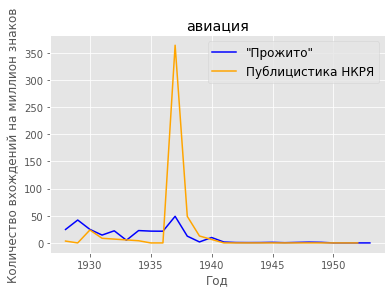

In [109]:
from matplotlib import style  # добавляем стили
style.use('ggplot')  # выбираем стиль ggplot

plt.plot(list(bigram_for_years_prozhito_per_million.keys()), list(bigram_for_years_prozhito_per_million.values()), 
         'blue',label='"Прожито"')
plt.plot(list(bigram_for_years_nkrya_per_million.keys()), list(bigram_for_years_nkrya_per_million.values()), 
         'orange',label='Публицистика НКРЯ')

plt.title(bigram)
plt.ylabel('Количество вхождений на миллион знаков')
plt.xlabel('Год')
plt.legend(fontsize=12)
plt.show()
#plt.savefig('троцки.png', format='png')
#сглаживание, посмотреть сколько данных на каждый год

In [ ]:
flat_dict_papers[1929]

In [ ]:
sum([len(year) for year in list(flat_prozhito_without_punkt.values())])

In [106]:
bigram = 'авиация'
bigram_for_years_prozhito = {}
for key, value in flat_prozhito_without_punkt.items():
    bigram_for_years_prozhito[key] = flat_prozhito_without_punkt[key].count(bigram)
print(bigram_for_years_prozhito)

{1928: 0, 1929: 0, 1930: 1, 1931: 0, 1932: 0, 1933: 4, 1934: 14, 1935: 14, 1936: 77, 1937: 42, 1938: 32, 1939: 29, 1940: 88, 1941: 368, 1942: 480, 1943: 384, 1944: 175, 1945: 192, 1946: 14, 1947: 11, 1948: 4, 1949: 1, 1950: 1, 1951: 4, 1952: 3, 1953: 4}


In [107]:
bigram_for_years_nkrya = {}
for key, value in sorted(flat_dict_papers.items()):
    bigram_for_years_nkrya[key] = ' '.join(flat_dict_papers[key]).count(bigram)
print(bigram_for_years_nkrya)

{1928: 4, 1929: 1, 1930: 8, 1931: 0, 1934: 1, 1935: 0, 1936: 7, 1937: 10, 1938: 23, 1939: 7, 1941: 602, 1942: 354, 1943: 25, 1944: 0, 1945: 30, 1947: 0, 1949: 0, 1950: 0, 1951: 0, 1952: 0}


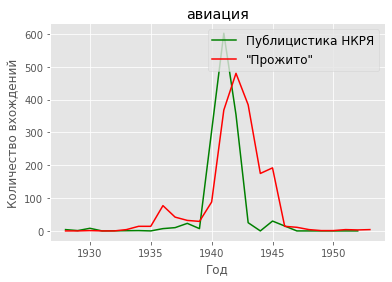

In [108]:
from matplotlib import style  # добавляем стили
style.use('ggplot')  # выбираем стиль ggplot

plt.plot(list(bigram_for_years_nkrya.keys()), list(bigram_for_years_nkrya.values()), 'g',label='Публицистика НКРЯ')
plt.plot(list(bigram_for_years_prozhito.keys()), list(bigram_for_years_prozhito.values()), 'r',label='"Прожито"')

plt.title(bigram)
plt.ylabel('Количество вхождений')
plt.xlabel('Год')
plt.legend(fontsize=12)
plt.savefig('троцки_абсолют.png', format='png')

исчезает упоминаемость - бояться

In [ ]:
как приложение к диплому - словарь общественно-политической лексики
ключевые слова
потом можно использовать
смотрим публицистику НКРЯ, иметь слово и смотреть статистику в НКРЯ и прожито
ценный датасет
биграммы в виде онтологии
в виде статистики отдельной


In [ ]:
all_topics = []
for file_root, dirs, files in os.walk('.'):
    for file in files:
        if file.endswith('.xhtml') or file.endswith('.xml'):
            tree = ET.parse(os.path.join(file_root, file))
            root = tree.getroot()
            for tag in root.iter('meta'):
                if tag.attrib['name'] in {'date', 'publ_year', 'created'}:
                    year = re.search(r'\d{4}', tag.attrib['content'])
                    if year:
                        if int(year[0]) in range(1928, 1954):
                            date = int(year[0])
                elif tag.attrib['name'] == 'topic':
                    topic = tag.attrib['content']
            if date and topic:
                all_topics.append(topic)
            date = None
            topic = None
sorted(dict(Counter(all_topics)).items(), key=lambda x: x[1], reverse=True)

In [ ]:
publ_places = []
for file_root, dirs, files in os.walk('.'):
    for file in files:
        if file.endswith('.xhtml') or file.endswith('.xml'):
            tree = ET.parse(os.path.join(file_root, file))
            root = tree.getroot()
            for tag in root.iter('meta'):
                if tag.attrib['name'] in {'date', 'publ_year', 'created'}:
                    year = re.search(r'\d{4}', tag.attrib['content'])
                    if year:
                        if int(year[0]) in range(1928, 1954):
                            date = int(year[0])
                elif tag.attrib['name'] == 'publication':
                    publ_place = tag.attrib['content']
            if date and publ_place:
                publ_places.append(publ_place)
            date = None
            publ_place = None
sorted(dict(Counter(publ_places)).items(), key=lambda x: x[1], reverse=True)

base_dict = pd.DataFrame({'Лексема': sorted(list(set(political_dict)))})

In [101]:
base_dict = pd.DataFrame({'Лексема': sorted(list(set(political_dict)))})

In [102]:
base_dict['Лемма'] = freq_by_nkrya['Лексема'].apply(lambda x: ' ' + preprocess_text(x) + ' ')

In [119]:
base_dict['ID'] = base_dict.index + 1

In [106]:
base_dict = base_dict[['ID', 'Лексема']]

In [107]:
base_dict = base_dict[['ID', 'Лексема']]

In [138]:
base_dict.to_excel('base_dict.xlsx')

AttributeError: 'NoneType' object has no attribute 'to_excel'

In [143]:
base_dict = pd.read_excel('base_dict.xlsx', index_col=0)

In [144]:
base_dict

ID                                            Лексема  \
0      1                                            Авиация   
1      2                                            Австрия   
2      3                                              Агент   
3      4                                           Агитатор   
4      5                                           Агитация   
5      6                                    Аграрный вопрос   
6      7                                  Агрессивная нация   
7      8                                               Азия   
8      9                                   Академик Лысенко   
9     10                     Акт безоговорочной капитуляции   
10    11                                  Александр Невский   
11    12                                          Аллилуева   
12    13                              Американская коалиция   
13    14                                    Англо-советский   
14    15                          Антипатриотическая группа   
16    17                             Антисоветская кампания   
17    18                                      Антисоветский   
18    19  Антисоветское объединенное троцкистско-зиновье...   
19    20                                              Армия   
20    21                                         Артиллерия   
21    22                                            Атомный   
22    23                                           Батальон   
23    24                                             Батрак   
24    25                                        Батрачество   
25    26                                        Безработица   
26    27                                       Беломорканал   
27    28                                  Белорусский фронт   
28    29                                       Белый террор   
29    30                                              Берия   
30    31                                       Беспартийный   
31    32                                           Бессонов   
32    33                                   Благо трудящихся   
33    34                    Блок коммунистов и беспартийных   
34    35                              Большевистская партия   
35    36                        Большевистская бдительность   
36    37                                             Борьба   
37    38                                      Борьба за мир   
38    39                             Борьба с бюрократизмом   
39    40                               Борьба с вредителями   
40    41                             Борьба с преступностью   
41    42                                Братская республика   
42    43                                           Булганин   
43    44                                              Бунин   
44    45                                          Буржуазия   
45    46                             Буржуазная апологетика   
46    47                                  Буржуазная партия   
47    48                                    Буржуазный цирк   
48    49                                   Буржуазный эстет   
49    50                                            Бухарин   
50    51                                          Бухаринец   
51    52                               Бухаринская агентура   
52    53                                 Бухаринские агенты   
53    54                                Бухаринские бандиты   
54    55                              Бухаринские вредители   
55    56                                Бухаринские выродки   
56    57                                Бухаринские изверги   
57    58                              Бухаринские изменники   
58    59                               Бухаринские мерзавцы   
59    60                              Бухаринские предатели   
60    61                                 Бухаринские шпионы   
61    62                                               ВДНХ   
62    63                                               ВСХВ   
63    64     Великая Октябрьская соци

In [130]:
base_dict = base_dict.drop_duplicates()
base_dict

ID                                            Лексема  \
0      1                                            Авиация   
1      2                                            Австрия   
2      3                                              Агент   
3      4                                           Агитатор   
4      5                                           Агитация   
5      6                                    Аграрный вопрос   
6      7                                  Агрессивная нация   
7      8                                               Азия   
8      9                                   Академик Лысенко   
9     10                     Акт безоговорочной капитуляции   
10    11                                  Александр Невский   
11    12                                          Аллилуева   
12    13                              Американская коалиция   
13    14                                    Англо-советский   
14    15                          Антипатриотическая группа   
16    17                             Антисоветская кампания   
17    18                                      Антисоветский   
18    19  Антисоветское объединенное троцкистско-зиновье...   
19    20                                              Армия   
20    21                                         Артиллерия   
21    22                                            Атомный   
22    23                                           Батальон   
23    24                                             Батрак   
24    25                                        Батрачество   
25    26                                        Безработица   
26    27                                       Беломорканал   
27    28                                  Белорусский фронт   
28    29                                       Белый террор   
29    30                                              Берия   
30    31                                       Беспартийный   
31    32                                           Бессонов   
32    33                                   Благо трудящихся   
33    34                    Блок коммунистов и беспартийных   
34    35                              Большевистская партия   
35    36                        Большевистская бдительность   
36    37                                             Борьба   
37    38                                      Борьба за мир   
38    39                             Борьба с бюрократизмом   
39    40                               Борьба с вредителями   
40    41                             Борьба с преступностью   
41    42                                Братская республика   
42    43                                           Булганин   
43    44                                              Бунин   
44    45                                          Буржуазия   
45    46                             Буржуазная апологетика   
46    47                                  Буржуазная партия   
47    48                                    Буржуазный цирк   
48    49                                   Буржуазный эстет   
49    50                                            Бухарин   
50    51                                          Бухаринец   
51    52                               Бухаринская агентура   
52    53                                 Бухаринские агенты   
53    54                                Бухаринские бандиты   
54    55                              Бухаринские вредители   
55    56                                Бухаринские выродки   
56    57                                Бухаринские изверги   
57    58                              Бухаринские изменники   
58    59                               Бухаринские мерзавцы   
59    60                              Бухаринские предатели   
60    61                                 Бухаринские шпионы   
61    62                                               ВДНХ   
62    63                                               ВСХВ   
63    64     Великая Октябрьская соци

In [141]:
base_dict = base_dict.reset_index(inplace = True)
base_dict

In [147]:
base_dict['Часть речи'] = base_dict.apply(POStag, axis=1)

In [149]:
base_dict['Лемма'] = base_dict['Лексема'].apply(lambda x: ' ' + preprocess_text(x) + ' ')

In [153]:
base_dict['Лексема'] = base_dict['Лексема'].str.lower()

In [155]:
clear_dict = pd.read_clipboard()

In [157]:
clear_dict.sort_values(by=['Лексема'])

Лексема            Категория  \
493                                              аборт  внутренняя политика   
0                                              авиация                война   
1                                              австрия     внешняя политика   
2                                                агент           идеологема   
3                                             агитатор           идеологема   
4                                             агитация           идеологема   
5                                      аграрный вопрос  внутренняя политика   
6                                    агрессивная нация           идеологема   
7                                                 азия     внешняя политика   
8                                     академик лысенко              человек   
9                       акт безоговорочной капитуляции     внешняя политика   
10                                   александр невский              человек   
11                                           аллилуева              человек   
12                               американская коалиция     внешняя политика   
494                              английская дипломатия     внешняя политика   
495                             английский империализм           идеологема   
496                           английское правительство     внешняя политика   
13                                     англо-советский     внешняя политика   
14                           антипатриотическая группа  внутренняя политика   
497                         антирелигиозная пропаганда           идеологема   
498                                    антирелигиозный           идеологема   
15                              антисоветская кампания           идеологема   
16                                       антисоветский           идеологема   
17   антисоветское объединенное троцкистско-зиновье...  внутренняя политика   
499                                              арест  внутренняя политика   
18                                               армия                война   
19                                          артиллерия                война   
20                                             атомный                война   
500                                    балканский пакт     внешняя политика   
21                                            батальон                война   
22                                              батрак           идеологема   
23                                         батрачество           идеологема   
24                                         безработица  внутренняя политика   
25                                        беломорканал  внутренняя политика   
26                                   белорусский фронт                война   
27                                        белый террор           идеологема   
28                                               берия              человек   
29                                        беспартийный           идеологема   
30                                            бессонов              человек   
31                                    благо трудящихся           идеологема   
32                     блок коммунистов и беспартийных           идеологема   
34                         большевистская бдительность           идеологема   
33                               большевистская партия  внутренняя политика   
35                                              борьба           идеологема   
36                                       борьба за мир           идеологема   
37                              борьба с бюрократизмом           идеологема   
38                                борьба с вредителями           идеологема   
39                              борьба с преступностью  внутренняя политика   
40                                 братская республика           идеологема   
41                                            булганин              человек   
42                

In [154]:
base_dict.to_excel('base_dict1.xlsx')

In [137]:
base_dict['Лексема'].to_list()

TypeError: 'NoneType' object is not subscriptable

In [135]:
base_dict1 = base_dict[['Лексемма', 'Категория']]
freq_by_nkrya['Лемма'] = freq_by_nkrya['Лексема'].apply(lambda x: ' ' + preprocess_text(x) + ' ')

TypeError: 'NoneType' object is not subscriptable

In [ ]:
freq_by_nkrya['Лемма'] = freq_by_nkrya['Лексема'].apply(lambda x: ' ' + preprocess_text(x) + ' ')

# Скрипт для составления словаря по прессе

In [21]:
def spacy_preprocess_text(some_text):
    lemmatized_text = [token.lemma_ for token in nlp(some_text) if token.lemma_ not in extended_punctuation 
                       and token.lemma_ not in stoplist]
    return ' '.join(lemmatized_text)

In [97]:
with open('political_dict.txt', 'r', encoding='utf8') as f:
    political_dict = f.read()

In [98]:
political_dict = [term.strip() for term in political_dict.split('\n\n')]
len(political_dict)

699

In [99]:
political_dict = set(political_dict)
len(political_dict)

667

In [100]:
political_dict

{'Авиация',
 'Австрия',
 'Агент',
 'Агитатор',
 'Агитация',
 'Аграрный вопрос',
 'Агрессивная нация',
 'Азия',
 'Академик Лысенко',
 'Акт безоговорочной капитуляции',
 'Александр Невский',
 'Аллилуева',
 'Американская коалиция',
 'Англо-советский',
 'Антипатриотическая группа',
 'Антипатриотический группа',
 'Антисоветская кампания',
 'Антисоветский',
 'Антисоветское объединенное троцкистско-зиновьевский центр',
 'Армия',
 'Артиллерия',
 'Атомный',
 'Батальон',
 'Батрак',
 'Батрачество',
 'Безработица',
 'Беломорканал',
 'Белорусский фронт',
 'Белый террор',
 'Берия',
 'Беспартийный',
 'Бессонов',
 'Благо трудящихся',
 'Блок коммунистов и беспартийных',
 'Большевистская партия',
 'Большевистский бдительность',
 'Борьба',
 'Борьба за мир',
 'Борьба с бюрократизмом',
 'Борьба с вредителями',
 'Борьба с преступностью',
 'Братская республика',
 'Булганин',
 'Бунин',
 'Буржуазия',
 'Буржуазная апологетика',
 'Буржуазная партия',
 'Буржуазный цирк',
 'Буржуазный эстет',
 'Бухарин',
 'Бухарин

In [9]:
length_papers = [len(flat_dict_papers[key]) for key in flat_dict_papers.keys()]
length_papers

NameError: name 'flat_dict_papers' is not defined

In [15]:
flat_spacy_stalin_notes = {key: [word for note in value for word in note if word not in stoplist] for key, value in spacy_stalin_notes.items()}

In [90]:
flat_spacy_stalin_notes[1929][4]

'новый'

In [76]:
freq_by_nkrya = pd.DataFrame({'Лексема': sorted(list(set(political_dict)))})

In [77]:
freq_by_nkrya['Лемма'] = freq_by_nkrya['Лексема'].apply(lambda x: ' ' + preprocess_text(x) + ' ')

In [78]:
def freq_in_papers(row, key):
    lemma = row['Лемма']
    return flat_dict_papers[key].count(lemma) / len(flat_dict_papers[year]) * 1000000

In [79]:
flat_papers = ' '.join([word for paper in [value for value in flat_dict_papers.values()] for word in paper])

In [80]:
freq_by_nkrya['Общая статистика'] = freq_by_nkrya['Лемма'].apply(lambda x: flat_papers.count(x) / sum(length_papers) 
                                                                 * 1000000)

In [85]:
for key in sorted(flat_dict_papers.keys()):
    freq_by_nkrya[key] = freq_by_nkrya['Лемма'].apply(lambda x: ' '.join(flat_dict_papers[key]).count(x) / 
                                                      len(flat_dict_papers[key]) * 1000000)
#     freq_by_nkrya[key] = bigram_for_years_nkrya_per_million[key] = (' '.join(flat_dict_papers[key]).count(bigram) / 
#                                                len(' '.join(flat_dict_papers[key]))) * 1000000
freq_by_nkrya

Лексема              Лемма  Общая статистика         1928  \
0            Авиация           авиация         624.437772    17.123654   
1            Австрия           австрия          67.175251    12.842741   
2              Агент             агент         186.922439    68.494617   
3           Агитатор          агитатор          37.968620    42.809135   
4           Агитация          агитация          54.324334   107.022839   
..               ...                ...               ...          ...   
653      шестидневка       шестидневка           5.841326     0.000000   
654          элемент           элемент         419.991355  1605.342580   
655             эсер              эсер          31.543162     0.000000   
656  японские шпионы    японский шпион          13.435050     0.000000   
657  японское войско   японский войско          11.098520     0.000000   

           1929        1930        1931         1934  1935         1936  ...  \
0     12.932930  154.472958    0.000000    34.786239   0.0   278.009452  ...   
1     25.865860   57.927359   76.740081  1843.670644   0.0     0.000000  ...   
2     38.798789  212.400317  306.960325     0.000000   0.0   476.587633  ...   
3     25.865860   19.309120    0.000000    69.572477   0.0     0.000000  ...   
4     64.664649   77.236479  306.960325     0.000000   0.0    39.715636  ...   
..          ...         ...         ...          ...   ...          ...  ...   
653    0.000000    0.000000    0.000000     0.000000   0.0     0.000000  ...   
654  711.311140  386.182394  153.480163   208.717431   0.0  1151.753445  ...   
655    0.000000   77.236479    0.000000    69.572477   0.0     0.000000  ...   
656    0.000000    0.000000    0.000000     0.000000   0.0     0.000000  ...   
657    0.000000    0.000000  383.700407     0.000000   0.0     0.000000  ...   

            1941          1942        1943       1944        1945        1947  \
0    1514.166654  10614.238760  465.714126   0.000000  139.341102    0.000000   
1       2.519412      0.000000    0.000000   0.000000   74.315255    0.000000   
2       7.558236      0.000000   18.628565  43.164847   13.934110    0.000000   
3       7.558236      0.000000    0.000000   0.000000    0.000000  769.674812   
4       0.000000      0.000000    0.000000  86.329693   13.934110  673.465461   
..           ...           ...         ...        ...         ...         ...   
653     0.000000      0.000000    0.000000   0.000000    0.000000    0.000000   
654   128.490016     60.308175   93.142825   0.000000  106.828178  384.837406   
655     0.000000      0.000000    0.000000   0.000000    0.000000    0.000000   
656     0.000000      0.000000    0.000000   0.000000    0.000000    0.000000   
657     0.000000      0.000000    0.000000   0.000000   23.223517    0.000000   

            1949        1950        1951       1952  
0       0.000000    0.000000    0.000000   0.000000  
1       0.000000    0.000000  622.342081   0.000000  
2     114.211749    0.000000   51.861840  54.068667  
3    1027.905737   96.814793    0.000000   0.000000  
4      76.141166  129.086391   51.861840   0.000000  
..           ...         ...         ...        ...  
653     0.000000    0.000000    0.000000   0.000000  
654    38.070583  225.901184  466.756561  54.068667  
655     0.000000    0.000000    0.000000   0.000000  
656     0.000000    0.000000    0.000000   0.000000  
657     0.000000    0.000000    0.000000   0.000000  

[658 rows x 23 columns]

In [86]:
freq_by_nkrya.loc[freq_by_nkrya['Общая статистика'] == 0]

Лексема  \
11                                           Аллилуева   
12                               Американская коалиция   
13                                     Англо-советский   
18   Антисоветское объединенное троцкистско-зиновье...   
40                              Борьба с преступностью   
51                                Бухаринская агентура   
54                               Бухаринские Вредители   
55                                 Бухаринские Выродки   
56                                 Бухаринские Изверги   
58                                Бухаринские Мерзавцы   
59                               Бухаринские Предатели   
60                                  Бухаринские Шпионы   
61                                                ВДНХ   
75                                      Вичугский бунт   
107                                              ГУЛАГ   
112                                   Германский фронт   
148                                               Дуче   
204                              Коммунистический союз   
206                       Коммунистический университет   
227                                             Куприн   
228                                            Кутепов   
297                                  Ненавидить немцев   
305                                   Олимпийские игры   
310                                       Ордженекидзе   
352                         Продовольственная карточка   
369                               Рабочий и колхозница   
416                              Советско-американский   
423                                    Социалистическо   
427                           Союз марксистов-ленинцев   
430                                 Союзное бюро РСДРП   
431  Спасибо товарищу Сталину за наше счастливое де...   
433                         Сталин – это Ленин сегодня   
436                                          Сталинизм   
441                                          Сто грамм   
449                               Сумбур вместо музыки   
450                                         Съезд КПСС   
459                                            Торгсин   
489                                   Хрустальная ночь   
492             Центральная Европа \nгражданская война   
506                                            Эфиопия   
513                                              аборт   
526                                 бухаринские шпионы   
545                            идеологический контроль   
584                                    новогодняя ёлка   
605                                           прописка   
630                              техническая Революция   
632                                        три колоска   
635                               троцкистские Взгляды   
637                           троцкистские Двурушкники   
638                               троцкистские Позиции   
639                              троцкистские Элементы   
642                                  троцкистский блок   
643                                   трудовые резервы   
649                              храм Христа Спасителя   

                                                 Лемма  Общая статистика  \
11                                           аллилуев                0.0   
12                              американский коалиция                0.0   
13                                    англо-советский                0.0   
18    антисоветский объединить троцкистско-зиновьев...               0.0   
40                                борьба преступность                0.0   
51                               бухаринский агентура                0.0   
54                              бухаринский вредитель                0.0   
55                                бухаринский выродок                0.0   
56                                 бухаринский изверг                0.0   
58                               бухаринский мерзавец                0.0   
59                  

In [87]:
len(political_dict)

658

In [82]:
bigram_for_years_nkrya_per_million = {}
for key, value in sorted(flat_dict_papers.items()):
    bigram_for_years_nkrya_per_million[key] = (' '.join(flat_dict_papers[key]).count(bigram) / 
                                               len(' '.join(flat_dict_papers[key]))) * 1000000
print(bigram_for_years_nkrya_per_million)

{1928: 3.387766677733371, 1929: 0.0, 1930: 23.7890302293695, 1931: 8.54218987579656, 1934: 4.012245372878024, 1935: 0.0, 1936: 0.0, 1937: 364.00090701865355, 1938: 48.899831412009796, 1939: 12.756422858909461, 1941: 0.0, 1942: 0.0, 1943: 0.0, 1944: 0.0, 1945: 0.0, 1947: 0.0, 1949: 0.0, 1950: 0.0, 1951: 0.0, 1952: 0.0}


In [89]:
freq_by_nkrya.to_excel('freq_by_nkrya.xlsx')

# Скрипт для словаря прессы с абсолютными метриками

In [90]:
abs_freq_by_nkrya = pd.DataFrame({'Лексема': sorted(list(set(political_dict)))})

In [91]:
abs_freq_by_nkrya['Лемма'] = abs_freq_by_nkrya['Лексема'].apply(lambda x: ' ' + preprocess_text(x) + ' ')

In [92]:
abs_freq_by_nkrya['Общее число вхождений'] = abs_freq_by_nkrya['Лемма'].apply(lambda x: flat_papers.count(x))

In [93]:
for key in sorted(flat_dict_papers.keys()):
    abs_freq_by_nkrya[key] = abs_freq_by_nkrya['Лемма'].apply(lambda x: ' '.join(flat_dict_papers[key]).count(x))
abs_freq_by_nkrya

Лексема              Лемма  Общее число вхождений  1928  1929  \
0            Авиация           авиация                    1069     4     1   
1            Австрия           австрия                     115     3     2   
2              Агент             агент                     320    16     3   
3           Агитатор          агитатор                      65    10     2   
4           Агитация          агитация                      93    25     5   
..               ...                ...                    ...   ...   ...   
653      шестидневка       шестидневка                      10     0     0   
654          элемент           элемент                     719   375    55   
655             эсер              эсер                      54     0     0   
656  японские шпионы    японский шпион                      23     0     0   
657  японское войско   японский войско                      19     0     0   

     1930  1931  1934  1935  1936  ...  1941  1942  1943  1944  1945  1947  \
0       8     0     1     0     7  ...   601   352    25     0    30     0   
1       3     1    53     0     0  ...     1     0     0     0    16     0   
2      11     4     0     0    12  ...     3     0     1     1     3     0   
3       1     0     2     0     0  ...     3     0     0     0     0     8   
4       4     4     0     0     1  ...     0     0     0     2     3     7   
..    ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   
653     0     0     0     0     0  ...     0     0     0     0     0     0   
654    20     2     6     0    29  ...    51     2     5     0    23     4   
655     4     0     2     0     0  ...     0     0     0     0     0     0   
656     0     0     0     0     0  ...     0     0     0     0     0     0   
657     0     5     0     0     0  ...     0     0     0     0     5     0   

     1949  1950  1951  1952  
0       0     0     0     0  
1       0     0    12     0  
2       3     0     1     1  
3      27     3     0     0  
4       2     4     1     0  
..    ...   ...   ...   ...  
653     0     0     0     0  
654     1     7     9     1  
655     0     0     0     0  
656     0     0     0     0  
657     0     0     0     0  

[658 rows x 23 columns]

In [94]:
len(flat_papers)

14858990

In [95]:
abs_freq_by_nkrya.to_excel('abs_freq_by_nkrya.xlsx')

# Скрипт для словаря в политических записях дневников с относительными метриками

In [13]:
pymorphy_notes = pd.read_excel('stalin_notes_pymorphy.xlsx', index_col=0)

In [14]:
political_pymorphy_notes = pymorphy_notes.loc[pymorphy_notes['Политическое'] == "['да']"]

In [15]:
political_pymorphy_notes['Год'] = political_pymorphy_notes['Дата'].dt.year

C:\Users\kryuk\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
political_pymorphy_notes_dict = political_pymorphy_notes[['Год', 'Леммы (pymorphy2)']]

In [17]:
pymorphy_notes_dict_by_years = {key: list(political_pymorphy_notes_dict.loc[political_pymorphy_notes_dict['Год'] == key]
                                          ['Леммы (pymorphy2)']) for key in range(1928, 1954)}

In [107]:
political_notes = list(political_pymorphy_notes['Леммы (pymorphy2)'])

In [108]:
political_notes = [word_tokenize(str(note)) for note in political_notes]

In [18]:
with open('political_notes.pickle', 'rb') as f:
    political_notes = pickle.load(f)

In [114]:
#словарь со списком списков  размеченных дневниковых записей по годам
pymorphy_notes_tokens_by_years = {key: [word_tokenize(str(note)) for note in value] for key, value in 
                                  pymorphy_notes_dict_by_years.items()}

In [115]:
with open('pymorphy_notes_tokens_by_years.pickle', 'wb') as fw:
    pickle.dump(pymorphy_notes_tokens_by_years, fw, protocol=2)

In [116]:
#словарь с мешками слов размеченных дневниковых записей по годам
flat_politic_notes = {key: [word for note in value for word in note] 
                      for key, value in pymorphy_notes_tokens_by_years.items()}

In [4]:
with open('flat_politic_notes.pickle', 'rb') as fw:
    flat_politic_notes = pickle.load(fw)

In [21]:
length_prozhito = [len(flat_politic_notes[key]) for key in flat_politic_notes.keys()]

In [10]:
freq_by_polit_prozhito = pd.DataFrame({'Лексема': sorted(list(set(political_dict)))})

In [298]:
df = pd.DataFrame({'Лексема': ['испания', 'испанский народ']})

In [304]:
df['Лемма'] = df['Лексема'].apply(lambda x: ' ' + preprocess_text(x) + ' ')

In [306]:
df['Общая статистика'] = df['Лемма'].apply(lambda x: flat_prozhito.count(x) / sum(length_prozhito) 
                                                                 * 1000000)

NameError: name 'flat_prozhito' is not defined

In [11]:
freq_by_polit_prozhito['Лемма'] = freq_by_polit_prozhito['Лексема'].apply(lambda x: ' ' + preprocess_text(x) + ' ')

In [19]:
flat_prozhito = ' '.join([str(value) for value in pymorphy_notes_dict_by_years.values()])

In [22]:
freq_by_polit_prozhito['Общая статистика'] = freq_by_polit_prozhito['Лемма'].apply(lambda x: flat_prozhito.count(x) / sum(length_prozhito) 
                                                                 * 1000000)

In [ ]:
df = pd.DataFrame({})

In [23]:
for key in sorted(flat_politic_notes.keys()):
    df[key] = freq_by_polit_prozhito['Лемма'].apply(lambda x: ' '.join(flat_politic_notes[key]).count(x) / 
                                                      len(flat_politic_notes[key]) * 1000000)
#     freq_by_nkrya[key] = bigram_for_years_nkrya_per_million[key] = (' '.join(flat_dict_papers[key]).count(bigram) / 
#                                                len(' '.join(flat_dict_papers[key]))) * 1000000
freq_by_polit_prozhito

Лексема              Лемма  Общая статистика        1928  \
0            Авиация           авиация         180.567321    0.000000   
1            Австрия           австрия          19.248789    3.567415   
2              Агент             агент          35.077743   64.213474   
3           Агитатор          агитатор          16.512921    3.567415   
4           Агитация          агитация          25.306784    3.567415   
..               ...                ...               ...         ...   
653      шестидневка       шестидневка           6.448833    0.000000   
654          элемент           элемент          79.340187  124.859533   
655             эсер              эсер           7.230510   14.269661   
656  японские шпионы    японский шпион           0.488548    0.000000   
657  японское войско   японский войско           4.592351    0.000000   

          1929        1930        1931       1932       1933        1934  ...  \
0     0.000000    3.966963    0.000000   0.000000  19.804431   58.429742  ...   
1     0.000000    0.000000   12.458420   0.000000   0.000000   79.297508  ...   
2    62.514791   31.735705   53.986487  62.890445  19.804431   62.603295  ...   
3     4.465342   23.801779   20.764033   0.000000   9.902216    4.173553  ...   
4    26.792053   39.669631   20.764033  10.481741  49.511078   25.041318  ...   
..         ...         ...         ...        ...        ...         ...  ...   
653   0.000000    0.000000    4.152807  10.481741   0.000000   12.520659  ...   
654  98.237529  107.108005  103.820167  68.131315  94.071048  150.247909  ...   
655   4.465342   23.801779   24.916840  41.926963  14.853323   16.694212  ...   
656   0.000000    0.000000    4.152807   0.000000   0.000000    0.000000  ...   
657   0.000000    0.000000    0.000000  10.481741   9.902216    0.000000  ...   

           1944        1945        1946        1947        1948       1949  \
0    236.290271  328.099449   61.491161   52.514239   28.658838  11.094592   
1      5.592669   92.496121   21.961129    9.548043    0.000000  11.094592   
2     22.370677   26.178148   35.137806   14.322065   28.658838  33.283777   
3     12.583506   13.961679   39.530032   14.322065   14.329419   0.000000   
4     25.167011   22.687728   52.706709   42.966195   21.494129  11.094592   
..          ...         ...         ...         ...         ...        ...   
653    0.000000    0.000000    0.000000    0.000000    0.000000   0.000000   
654   67.112030  113.438639  153.727902  128.898585  128.964771  99.851332   
655    2.796335    1.745210    4.392226    0.000000    0.000000   0.000000   
656    0.000000    0.000000    0.000000    0.000000    0.000000   0.000000   
657   20.972509   10.471259    0.000000    0.000000    0.000000   0.000000   

           1950       1951       1952        1953  
0      7.340904  20.540348  20.096194   17.213778  
1      0.000000   6.846783   6.698731    0.000000  
2     14.681809  13.693565   6.698731   22.951704  
3     29.363617  27.387131  13.397463   17.213778  
4     36.704521   6.846783   0.000000   22.951704  
..          ...        ...        ...         ...  
653    0.000000   0.000000   0.000000    0.000000  
654  110.113564  68.467827  46.891119  103.282667  
655    0.000000  13.693565   6.698731    0.000000  
656    0.000000   0.000000   0.000000    0.000000  
657    0.000000   0.000000   0.000000    0.000000  

[658 rows x 29 columns]

In [33]:
#freq_by_prozhito = pd.read_excel('freq_by_prozhito.xlsx', index_col=0)

In [37]:
freq_by_prozhito['Часть речи'] = freq_by_prozhito.apply(POStag, axis=1)

In [24]:
freq_by_polit_prozhito.to_excel('freq_by_polit_prozhito.xlsx')

In [ ]:
length_political_notes = [len(flat_dict_papers[key]) for key in flat_dict_papers.keys()]
length_papers

# Скрипт для словаря по всем записям дневников с относительными метриками

In [25]:
all_pymorphy_notes = pd.read_excel('stalin_notes_pymorphy.xlsx', index_col=0)

In [5]:
all_pymorphy_notes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119394 entries, 0 to 119393
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Текст              119394 non-null  object        
 1   Дата               119394 non-null  datetime64[ns]
 2   Автор              119382 non-null  object        
 3   Политическое       119394 non-null  object        
 4   Леммы (pymorphy2)  119360 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 5.5+ MB


In [26]:
all_pymorphy_notes['Год'] = all_pymorphy_notes['Дата'].dt.year

In [27]:
all_pymorphy_notes_dict = all_pymorphy_notes[['Год', 'Леммы (pymorphy2)']]

In [28]:
all_pymorphy_notes_dict_by_years = {key: list(all_pymorphy_notes_dict.loc[all_pymorphy_notes_dict['Год'] == key]['Леммы (pymorphy2)'])
                                for key in range(1928, 1954)}

In [29]:
#словарь со списком списков всех дневниковых записей по годам
all_pymorphy_notes_tokens_by_years = {key: [word_tokenize(str(note)) for note in value] for key, value in 
                                  all_pymorphy_notes_dict_by_years.items()}

In [11]:
# with open('all_pymorphy_notes_tokens_by_years.pickle', 'wb') as fw:
#     pickle.dump(all_pymorphy_notes_tokens_by_years, fw, protocol=2)

In [13]:
#словарь с мешками слов всех дневниковых записей по годам
flat_all_notes = {key: [word for note in value for word in note]
                  for key, value in all_pymorphy_notes_tokens_by_years.items()}

In [30]:
with open('flat_all_notes.pickle', 'rb') as fw:
    flat_all_notes = pickle.load(fw)

In [31]:
length_all_prozhito = [len(flat_all_notes[key]) for key in flat_all_notes.keys()]

In [32]:
freq_by_all_prozhito = pd.DataFrame({'Лексема': sorted(list(set(political_dict)))})

In [33]:
freq_by_all_prozhito['Лемма'] = freq_by_all_prozhito['Лексема'].apply(lambda x: ' ' + preprocess_text(x) + ' ')

In [34]:
flat_all_prozhito = ' '.join([str(value) for value in all_pymorphy_notes_dict_by_years.values()])

In [35]:
freq_by_all_prozhito['Общая статистика'] = freq_by_all_prozhito['Лемма'].apply(lambda x: flat_all_prozhito.count(x) 
                                                                               / sum(length_all_prozhito) * 1000000)

In [43]:
freq_by_prozhito

Лексема            Лемма        1928        1929        1930  \
0            Авиация          авиация    0.000000    0.000000    3.966963   
1            Австрия          австрия    3.567415    0.000000    0.000000   
2              Агент            агент   85.617966   71.445476   43.636594   
3           Агитатор         агитатор    3.567415    4.465342   27.768742   
4           Агитация         агитация    3.567415   26.792053   39.669631   
..               ...              ...         ...         ...         ...   
653      шестидневка      шестидневка    0.000000    0.000000    0.000000   
654          элемент          элемент  156.966270  133.960267  138.843710   
655             эсер             эсер   17.837076    8.930684   27.768742   
656  японские шпионы   японский шпион    0.000000    0.000000    0.000000   
657  японское войско  японский войско    0.000000    0.000000    0.000000   

           1931       1932        1933        1934        1935  ...  \
0      0.000000   0.000000   19.804431   58.429742   48.984447  ...   
1     12.458420   5.240870    0.000000   83.471061   45.485558  ...   
2     62.292100  83.853926   69.315509   91.818167  115.463340  ...   
3     24.916840  10.481741   24.755539    8.347106    6.997778  ...   
4     20.764033  10.481741   49.511078   25.041318   27.991113  ...   
..          ...        ...         ...         ...         ...  ...   
653    4.152807  10.481741    0.000000   12.520659   10.496667  ...   
654  124.584200  99.576538  108.924372  171.115674  192.438901  ...   
655   37.375260  41.926963   14.853323   16.694212   38.487780  ...   
656    4.152807   0.000000    0.000000    0.000000    0.000000  ...   
657    0.000000  10.481741    9.902216    0.000000    0.000000  ...   

           1946        1947        1948        1949        1950        1951  \
0     61.491161   52.514239   28.658838   11.094592    7.340904   27.387131   
1     21.961129    9.548043    0.000000   11.094592    0.000000    6.846783   
2     35.137806   19.096087   28.658838   44.378370   36.704521   34.233913   
3     39.530032   19.096087   14.329419    0.000000   36.704521   27.387131   
4     52.706709   42.966195   21.494129   11.094592   36.704521    6.846783   
..          ...         ...         ...         ...         ...         ...   
653    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
654  202.042385  152.768694  200.611866  144.229702  198.204415  143.782437   
655    4.392226    0.000000    0.000000    0.000000    0.000000   13.693565   
656    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
657    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   

          1952        1953           Часть речи  Общая статистика  
0    20.096194   22.951704  имя существительное        186.234478  
1     6.698731    0.000000  имя существительное         20.909852  
2     6.698731   22.951704  имя существительное         58.039496  
3    20.096194   17.213778  имя существительное         19.541918  
4     0.000000   28.689630  имя существительное         25.795332  
..         ...         ...                  ...               ...  
653   0.000000    0.000000  имя существительное          6.741962  
654  87.083506  114.758519  имя существительное        109.239321  
655   6.698731    0.000000  имя существительное          8.598444  
656   0.000000    0.000000       словосочетание          0.586258  
657   0.000000    0.000000       словосочетание          4.787770  

[658 rows x 30 columns]

In [36]:
for key in sorted(flat_all_notes.keys()):
    freq_by_all_prozhito[key] = freq_by_all_prozhito['Лемма'].apply(lambda x: ' '.join(flat_all_notes[key]).count(x) / 
                                                      len(flat_all_notes[key]) * 1000000)
#     freq_by_nkrya[key] = bigram_for_years_nkrya_per_million[key] = (' '.join(flat_dict_papers[key]).count(bigram) / 
#                                                len(' '.join(flat_dict_papers[key]))) * 1000000
freq_by_all_prozhito

Лексема              Лемма  Общая статистика        1928  \
0            Авиация           авиация         169.637231    0.000000   
1            Австрия           австрия          18.436865    3.189976   
2              Агент             агент          33.529788   57.419565   
3           Агитатор          агитатор          15.544808    3.189976   
4           Агитация          агитация          24.130602    3.189976   
..               ...                ...               ...         ...   
653      шестидневка       шестидневка           6.959013    0.000000   
654          элемент           элемент          75.103111  114.839130   
655             эсер              эсер           6.778259   12.759903   
656  японские шпионы    японский шпион           0.451884    0.000000   
657  японское войско   японский войско           4.247709    0.000000   

          1929        1930       1931       1932       1933        1934  ...  \
0     0.000000    3.691563   0.000000   0.000000  18.053311   54.321045  ...   
1     0.000000    0.000000  11.290930   0.000000   0.000000   73.721418  ...   
2    56.601790   29.532501  48.927362  57.144762  18.053311   69.841344  ...   
3     4.042985   22.149375  18.818216   0.000000   9.026656    3.880075  ...   
4    24.257910   40.607188  18.818216   9.524127  45.133279   27.160523  ...   
..         ...         ...        ...        ...        ...         ...  ...   
653   0.000000    0.000000   3.763643   9.524127   0.000000   11.640224  ...   
654  92.988655  103.363752  94.091080  61.906825  90.266557  139.682687  ...   
655   4.042985   22.149375  22.581859  38.096508  13.539984   15.520299  ...   
656   0.000000    0.000000   3.763643   0.000000   0.000000    0.000000  ...   
657   0.000000    0.000000   0.000000   9.524127   9.026656    0.000000  ...   

           1944        1945        1946        1947        1948       1949  \
0    228.200013  313.884084   57.425060   48.838531   26.228132   9.961747   
1      7.868966   94.165225   20.508950    8.879733    0.000000   9.961747   
2     20.983909   24.780322   32.814320   17.759466   26.228132  29.885241   
3     11.803449   13.216172   36.916110   13.319599   13.114066   0.000000   
4     24.918392   21.476279   49.221480   39.958798   19.671099  19.923494   
..          ...         ...         ...         ...         ...        ...   
653    0.000000    0.000000    0.000000    0.000000    0.000000   0.000000   
654   64.263222  107.381397  151.766231  119.876394  118.026595  89.655722   
655    2.622989    1.652021    4.101790    0.000000    0.000000   0.000000   
656    0.000000    0.000000    0.000000    0.000000    0.000000   0.000000   
657   19.672415    9.912129    0.000000    0.000000    0.000000   0.000000   

           1950       1951       1952       1953  
0      6.746318  18.958424  18.493062  15.510689  
1      0.000000   6.319475   6.164354   0.000000  
2     13.492636  12.638949   6.164354  25.851149  
3     26.985273  25.277899  12.328708  15.510689  
4     33.731591   6.319475   0.000000  20.680919  
..          ...        ...        ...        ...  
653    0.000000   0.000000   0.000000   0.000000  
654  101.194773  63.194747  43.150478  93.064137  
655    0.000000  18.958424   6.164354   0.000000  
656    0.000000   0.000000   0.000000   0.000000  
657    0.000000   0.000000   0.000000   0.000000  

[658 rows x 29 columns]

In [37]:
freq_by_all_prozhito.to_excel('freq_by_all_prozhito.xlsx')

In [ ]:
# length_political_notes = [len(flat_dict_papers[key]) for key in flat_dict_papers.keys()]
# length_papers

In [40]:
freq_by_all_prozhito['Часть речи'] = freq_by_all_prozhito.apply(POStag, axis=1)
freq_by_all_prozhito

Лексема            Лемма  Общая статистика        1928  \
0            Авиация          авиация        175.421346    0.000000   
1            Австрия          австрия         19.973270    3.189976   
2              Агент            агент         55.400971   76.559420   
3           Агитатор         агитатор         18.527242    3.189976   
4           Агитация         агитация         24.582486    3.189976   
..               ...              ...               ...         ...   
653      шестидневка      шестидневка          7.320520    0.000000   
654          элемент          элемент        103.029538  143.548912   
655             эсер             эсер          8.133911   15.949879   
656  японские шпионы   японский шпион          0.542261    0.000000   
657  японское войско  японский войско          4.428463    0.000000   

           1929        1930        1931       1932        1933        1934  \
0      0.000000    3.691563    0.000000   0.000000   18.053311   54.321045   
1      0.000000    0.000000   11.290930   4.762063    0.000000   77.601493   
2     64.687760   40.607188   56.454648  80.955079   67.699918   97.001866   
3      4.042985   25.840938   22.581859   9.524127   22.566639    7.760149   
4     24.257910   40.607188   18.818216   9.524127   45.133279   27.160523   
..          ...         ...         ...        ...         ...         ...   
653    0.000000    0.000000    3.763643   9.524127    0.000000   11.640224   
654  125.332536  132.896252  112.909296  90.479206  103.806541  159.083061   
655    8.085970   25.840938   33.872789  42.858571   13.539984   15.520299   
656    0.000000    0.000000    3.763643   0.000000    0.000000    0.000000   
657    0.000000    0.000000    0.000000   9.524127    9.026656    0.000000   

           1935        1936        1937        1938       1939  \
0     45.805972  209.280077   93.790615   87.810286  80.483344   
1     42.534117   19.025462   26.797318  145.435786  22.202302   
2    107.971221   65.230154  107.189274   93.298429  77.708056   
3      6.543710    5.435846   11.165549    5.488143   5.550575   
4     26.174841    5.435846   13.398659   13.720357  19.427014   
..          ...         ...         ...         ...        ...   
653    9.815566   13.589615   24.564209   21.952571  36.078740   
654  179.952035  111.434846  125.054153  126.227286  55.505755   
655   35.990407   10.871692   29.030428    0.000000   0.000000   
656    0.000000    0.000000    2.233110    2.744071   0.000000   
657    0.000000    0.000000    0.000000    2.744071   2.775288   

              Часть речи  
0    имя существительное  
1    имя существительное  
2    имя существительное  
3    имя существительное  
4    имя существительное  
..                   ...  
653  имя существительное  
654  имя существительное  
655  имя существительное  
656       словосочетание  
657       словосочетание  

[658 rows x 16 columns]

# Скрипт для словаря в политических записях дневников с абсолютными метриками

In [38]:
abs_freq_by_prozhito = pd.DataFrame({'Лексема': sorted(list(set(political_dict)))})

In [39]:
abs_freq_by_prozhito['Лемма'] = abs_freq_by_prozhito['Лексема'].apply(lambda x: ' ' + preprocess_text(x) + ' ')

In [40]:
for key in sorted(flat_politic_notes.keys()):
    abs_freq_by_prozhito[key] = abs_freq_by_prozhito['Лемма'].apply(lambda x: ' '.join(flat_politic_notes[key]).count(x))
#     freq_by_nkrya[key] = bigram_for_years_nkrya_per_million[key] = (' '.join(flat_dict_papers[key]).count(bigram) / 
#                                                len(' '.join(flat_dict_papers[key]))) * 1000000
abs_freq_by_prozhito

Лексема              Лемма  1928  1929  1930  1931  1932  1933  \
0            Авиация           авиация      0     0     1     0     0     4   
1            Австрия           австрия      1     0     0     3     0     0   
2              Агент             агент     18    14     8    13    12     4   
3           Агитатор          агитатор      1     1     6     5     0     2   
4           Агитация          агитация      1     6    10     5     2    10   
..               ...                ...   ...   ...   ...   ...   ...   ...   
653      шестидневка       шестидневка      0     0     0     1     2     0   
654          элемент           элемент     35    22    27    25    13    19   
655             эсер              эсер      4     1     6     6     8     3   
656  японские шпионы    японский шпион      0     0     0     1     0     0   
657  японское войско   японский войско      0     0     0     0     2     2   

     1934  1935  ...  1944  1945  1946  1947  1948  1949  1950  1951  1952  \
0      14    14  ...   169   188    14    11     4     1     1     3     3   
1      19    12  ...     4    53     5     2     0     1     0     1     1   
2      15    23  ...    16    15     8     3     4     3     2     2     1   
3       1     1  ...     9     8     9     3     2     0     4     4     2   
4       6     8  ...    18    13    12     9     3     1     5     1     0   
..    ...   ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
653     3     3  ...     0     0     0     0     0     0     0     0     0   
654    36    42  ...    48    65    35    27    18     9    15    10     7   
655     4    10  ...     2     1     1     0     0     0     0     2     1   
656     0     0  ...     0     0     0     0     0     0     0     0     0   
657     0     0  ...    15     6     0     0     0     0     0     0     0   

     1953  
0       3  
1       0  
2       4  
3       3  
4       4  
..    ...  
653     0  
654    18  
655     0  
656     0  
657     0  

[658 rows x 28 columns]

In [42]:
abs_freq_by_prozhito['Общее число вхождений'] = abs_freq_by_prozhito['Лемма'].apply(lambda x: flat_prozhito.count(x))

In [245]:
abs_freq_by_prozhito

Лексема            Лемма  1928  1929  1930  1931  1932  1933  \
0            Авиация          авиация     0     0     1     0     0     4   
1            Австрия          австрия     1     0     0     3     1     0   
2              Агент            агент    24    16    11    15    16    14   
3           Агитатор         агитатор     1     1     7     6     2     5   
4           Агитация         агитация     1     6    10     5     2    10   
..               ...              ...   ...   ...   ...   ...   ...   ...   
653      шестидневка      шестидневка     0     0     0     1     2     0   
654          элемент          элемент    44    30    35    30    19    22   
655             эсер             эсер     5     2     7     9     8     3   
656  японские шпионы   японский шпион     0     0     0     1     0     0   
657  японское войско  японский войско     0     0     0     0     2     2   

     1934  1935  ...  1945  1946  1947  1948  1949  1950  1951  1952  1953  \
0      14    14  ...   190    14    11     4     1     1     4     3     4   
1      20    13  ...    55     5     2     0     1     0     1     1     0   
2      22    33  ...    21     8     4     4     4     5     5     1     4   
3       2     2  ...    10     9     4     2     0     5     4     3     3   
4       6     8  ...    13    12     9     3     1     5     1     0     5   
..    ...   ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
653     3     3  ...     0     0     0     0     0     0     0     0     0   
654    41    55  ...    76    46    32    28    13    27    21    13    20   
655     4    11  ...     1     1     0     0     0     0     2     1     0   
656     0     0  ...     0     0     0     0     0     0     0     0     0   
657     0     0  ...     7     0     0     0     0     0     0     0     0   

     Общее число вхождений  
0                     1906  
1                      214  
2                      594  
3                      200  
4                      264  
..                     ...  
653                     69  
654                   1118  
655                     88  
656                      6  
657                     49  

[658 rows x 29 columns]

In [230]:
len(flat_prozhito)

82896201

In [43]:
abs_freq_by_prozhito.to_excel('abs_freq_by_prozhito.xlsx')

# Скрипт для словаря по всем записям дневников с абсолютными метриками

In [44]:
abs_freq_by_all_prozhito = pd.DataFrame({'Лексема': sorted(list(set(political_dict)))})

In [45]:
abs_freq_by_all_prozhito['Лемма'] = abs_freq_by_all_prozhito['Лексема'].apply(lambda x: ' ' + preprocess_text(x) + ' ')

In [46]:
abs_freq_by_all_prozhito['Общее число вхождений'] = abs_freq_by_all_prozhito['Лемма'].apply(lambda x: flat_all_prozhito.count(x))

In [47]:
for key in sorted(flat_all_notes.keys()):
    abs_freq_by_all_prozhito[key] = abs_freq_by_all_prozhito['Лемма'].apply(lambda x: ' '.join(flat_all_notes[key]).count(x))
#     freq_by_nkrya[key] = bigram_for_years_nkrya_per_million[key] = (' '.join(flat_dict_papers[key]).count(bigram) / 
#                                                len(' '.join(flat_dict_papers[key]))) * 1000000
abs_freq_by_all_prozhito

Лексема              Лемма  Общее число вхождений  1928  1929  \
0            Авиация           авиация                    1877     0     0   
1            Австрия           австрия                     204     1     0   
2              Агент             агент                     371    18    14   
3           Агитатор          агитатор                     172     1     1   
4           Агитация          агитация                     267     1     6   
..               ...                ...                    ...   ...   ...   
653      шестидневка       шестидневка                      77     0     0   
654          элемент           элемент                     831    36    23   
655             эсер              эсер                      75     4     1   
656  японские шпионы    японский шпион                       5     0     0   
657  японское войско   японский войско                      47     0     0   

     1930  1931  1932  1933  1934  ...  1944  1945  1946  1947  1948  1949  \
0       1     0     0     4    14  ...   174   190    14    11     4     1   
1       0     3     0     0    19  ...     6    57     5     2     0     1   
2       8    13    12     4    18  ...    16    15     8     4     4     3   
3       6     5     0     2     1  ...     9     8     9     3     2     0   
4      11     5     2    10     7  ...    19    13    12     9     3     2   
..    ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   
653     0     1     2     0     3  ...     0     0     0     0     0     0   
654    28    25    13    20    36  ...    49    65    37    27    18     9   
655     6     6     8     3     4  ...     2     1     1     0     0     0   
656     0     1     0     0     0  ...     0     0     0     0     0     0   
657     0     0     2     2     0  ...    15     6     0     0     0     0   

     1950  1951  1952  1953  
0       1     3     3     3  
1       0     1     1     0  
2       2     2     1     5  
3       4     4     2     3  
4       5     1     0     4  
..    ...   ...   ...   ...  
653     0     0     0     0  
654    15    10     7    18  
655     0     3     1     0  
656     0     0     0     0  
657     0     0     0     0  

[658 rows x 29 columns]

In [48]:
#длина всего корпуса прожито в знаках
len(flat_all_prozhito)

89365632

In [49]:
abs_freq_by_all_prozhito.to_excel('abs_freq_by_all_prozhito.xlsx')

In [60]:
flat_all_notes[1929].count(['строительство', 'коммунизм'])

0

In [63]:
' '.join(flat_all_notes[1929])

"ночь январь новый последний конец конец ранний поздний совершенно неизбежно интересный пожалуй смерть послать судьбина всё-таки приятный созерцать солнце пурпурный погружаться море лазурный бальмонт наступить настоящий социализм карточка стандартный хлеб становиться несъедобный пустой кооператив придушить частник голод холод всякий налог отсутствие одежда обувь товар вообще социализм личный социализм наступить ранний распоряжение смольный кугель уволить распоряжение чагин печатать колесо судьба поворачиваться градус что-то начинать изобретать т. д. наладиться работа ахти как—пожаловать бриться новый начинаться по-новому приезд ташкент прожить отрез измеряться вообще начать что-нибудь новый новый место например париж вена флоренция равно готовый одобрять издалёка опыт построение социализм немой участвовать жертва годик-подышать вольный воздух настоящий смесь аракчеевский казарма вонючий тюрьма готтентот большой непереносимый непереносимый вторник утром синий птица -й страшный метель не

In [55]:
freq_by_all_prozhito.sort_values(by=['Общая статистика'])[:100]

Лексема                        Лемма  \
557             католический поп             католический поп   
545      идеологический контроль      идеологический контроль   
61                          ВДНХ                         вднх   
32              Благо трудящихся             благо трудящийся   
433   Сталин – это Ленин сегодня               сталин – ленин   
..                           ...                          ...   
450                   Съезд КПСС                   съезд кпсс   
449         Сумбур вместо музыки         сумбур вместо музыка   
442     Строительство Коммунизма      строительство коммунизм   
207  Коммунистическое воспитание  коммунистический воспитание   
558       классовая бдительность       классовый бдительность   

     Общая статистика  1928      1929  1930  1931  1932      1933  1934  ...  \
557           0.00000   0.0  0.000000   0.0   0.0   0.0  0.000000   0.0  ...   
545           0.00000   0.0  0.000000   0.0   0.0   0.0  0.000000   0.0  ...   
61            0.00000   0.0  0.000000   0.0   0.0   0.0  0.000000   0.0  ...   
32            0.00000   0.0  0.000000   0.0   0.0   0.0  0.000000   0.0  ...   
433           0.00000   0.0  0.000000   0.0   0.0   0.0  0.000000   0.0  ...   
..                ...   ...       ...   ...   ...   ...       ...   ...  ...   
450           0.27113   0.0  0.000000   0.0   0.0   0.0  0.000000   0.0  ...   
449           0.27113   0.0  0.000000   0.0   0.0   0.0  0.000000   0.0  ...   
442           0.27113   0.0  4.042985   0.0   0.0   0.0  0.000000   0.0  ...   
207           0.27113   0.0  0.000000   0.0   0.0   0.0  0.000000   0.0  ...   
558           0.27113   0.0  0.000000   0.0   0.0   0.0  4.513328   0.0  ...   

     1944  1945  1946  1947  1948      1949  1950      1951  1952     1953  
557   0.0   0.0   0.0   0.0   0.0  0.000000   0.0  0.000000   0.0  0.00000  
545   0.0   0.0   0.0   0.0   0.0  0.000000   0.0  0.000000   0.0  0.00000  
61    0.0   0.0   0.0   0.0   0.0  0.000000   0.0  0.000000   0.0  0.00000  
32    0.0   0.0   0.0   0.0   0.0  0.000000   0.0  0.000000   0.0  0.00000  
433   0.0   0.0   0.0   0.0   0.0  0.000000   0.0  0.000000   0.0  0.00000  
..    ...   ...   ...   ...   ...       ...   ...       ...   ...      ...  
450   0.0   0.0   0.0   0.0   0.0  0.000000   0.0  0.000000   0.0  5.17023  
449   0.0   0.0   0.0   0.0   0.0  0.000000   0.0  6.319475   0.0  0.00000  
442   0.0   0.0   0.0   0.0   0.0  0.000000   0.0  0.000000   0.0  5.17023  
207   0.0   0.0   0.0   0.0   0.0  9.961747   0.0  0.000000   0.0  5.17023  
558   0.0   0.0   0.0   0.0   0.0  0.000000   0.0  0.000000   0.0  0.00000  

[100 rows x 30 columns]

# Составление словаря со статистикой Google Books Ngramm

In [78]:
import pandas as pd
import glob

path = r'ngramms'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df.T)

#frame = pd.concat(li, axis=0, ignore_index=True)

In [79]:
frame = pd.concat(li)

In [80]:
example = pd.read_csv('ngramms/Антисоветскаякампания-rus_2019-1928-1953-3-caseInsensitive.csv')

In [81]:
frame.columns = example['year']
frame

year                     1928          1929          1930          1931  \
year             1.928000e+03  1.929000e+03  1.930000e+03  1.931000e+03   
аборт            9.742644e-07  9.826636e-07  9.951605e-07  9.737801e-07   
year             1.928000e+03  1.929000e+03  1.930000e+03  1.931000e+03   
Авиация          4.821602e-06  4.984004e-06  5.361248e-06  5.725615e-06   
year             1.928000e+03  1.929000e+03  1.930000e+03  1.931000e+03   
...                       ...           ...           ...           ...   
японские шпионы  1.748532e-09  1.398826e-09  4.784391e-09  5.477277e-09   
year             1.928000e+03  1.929000e+03  1.930000e+03  1.931000e+03   
японское войско  0.000000e+00  0.000000e+00  9.046758e-10  7.754364e-10   
year             1.928000e+03  1.929000e+03  1.930000e+03  1.931000e+03   
Ячейка           6.872194e-06  7.144391e-06  7.237667e-06  6.894754e-06   

year                     1932          1933          1934          1935  \
year             1.932000e+03  1.933000e+03  1.934000e+03  1.935000e+03   
аборт            9.418019e-07  9.855149e-07  9.772512e-07  9.614684e-07   
year             1.932000e+03  1.933000e+03  1.934000e+03  1.935000e+03   
Авиация          6.184901e-06  6.417238e-06  6.828571e-06  8.046336e-06   
year             1.932000e+03  1.933000e+03  1.934000e+03  1.935000e+03   
...                       ...           ...           ...           ...   
японские шпионы  6.629375e-09  7.260110e-09  2.648628e-08  3.227897e-08   
year             1.932000e+03  1.933000e+03  1.934000e+03  1.935000e+03   
японское войско  1.927535e-09  2.558270e-09  3.190312e-09  3.914398e-09   
year             1.932000e+03  1.933000e+03  1.934000e+03  1.935000e+03   
Ячейка           7.097114e-06  6.806752e-06  6.403673e-06  5.344542e-06   

year                     1936          1937  ...          1944          1945  \
year             1.936000e+03  1.937000e+03  ...  1.944000e+03  1.945000e+03   
аборт            9.992277e-07  9.625735e-07  ...  3.804515e-07  3.819031e-07   
year             1.936000e+03  1.937000e+03  ...  1.944000e+03  1.945000e+03   
Авиация          8.552724e-06  9.678546e-06  ...  1.541812e-05  1.406322e-05   
year             1.936000e+03  1.937000e+03  ...  1.944000e+03  1.945000e+03   
...                       ...           ...  ...           ...           ...   
японские шпионы  3.648806e-08  3.847399e-08  ...  8.876351e-09  7.922942e-09   
year             1.936000e+03  1.937000e+03  ...  1.944000e+03  1.945000e+03   
японское войско  3.914398e-09  3.138961e-09  ...  0.000000e+00  0.000000e+00   
year             1.936000e+03  1.937000e+03  ...  1.944000e+03  1.945000e+03   
Ячейка           4.450623e-06  3.678667e-06  ...  1.319002e-06  1.229044e-06   

year                     1946          1947          1948          1949  \
year             1.946000e+03  1.947000e+03  1.948000e+03  1.949000e+03   
аборт            3.801870e-07  4.496906e-07  4.827869e-07  4.710395e-07   
year             1.946000e+03  1.947000e+03  1.948000e+03  1.949000e+03   
Авиация          1.145773e-05  8.862262e-06  4.657872e-06  4.095322e-06   
year             1.946000e+03  1.947000e+03  1.948000e+03  1.949000e+03   
...                       ...           ...           ...           ...   
японские шпионы  8.931411e-09  1.255724e-08  1.570377e-08  1.633766e-08   
year             1.946000e+03  1.947000e+03  1.948000e+03  1.949000e+03   
японское войско  1.344625e-09  1.707208e-09  2.100524e-09  2.100524e-09   
year             1.946000e+03  1.947000e+03  1.948000e+03  1.949000e+03   
Ячейка           1.343635e-06  1.497937e-06  1.573923e-06  1.619464e-06   

year                     1950          1951          1952          1953  
year             1.950000e+03  1.951000e+03  1.952000e+03  1.953000e+03  
аборт            4.661350e-07  4.793226e-07  4.911263e-07  4.921221e-07  
year             1.950000e+03  1.951000e+03  1.952000e+03  1.953000e+03  
Авиация          3.491197e-06  3.339102e

In [82]:
ngramm_stat = frame.reset_index()

In [83]:
ngramm_stat = ngramm_stat.rename(columns={"index": "Лексема"})

In [85]:
ngramm_stat = ngramm_stat.query('Лексема != "year"').reset_index()
ngramm_stat

year  index            Лексема          1928          1929          1930  \
0         1              аборт  9.742644e-07  9.826636e-07  9.951605e-07   
1         3            Авиация  4.821602e-06  4.984004e-06  5.361248e-06   
2         5            Австрия  6.252981e-06  5.998025e-06  6.245759e-06   
3         7              Агент  6.444720e-06  6.328157e-06  6.322440e-06   
4         9           Агитатор  1.839153e-06  1.880772e-06  2.255069e-06   
..      ...                ...           ...           ...           ...   
558    1187  Японская военщина  2.221258e-08  3.844951e-08  5.827686e-08   
559    1189  Японская разведка  5.576699e-09  9.975877e-09  9.217907e-09   
560    1191    японские шпионы  1.748532e-09  1.398826e-09  4.784391e-09   
561    1193    японское войско  0.000000e+00  0.000000e+00  9.046758e-10   
562    1195             Ячейка  6.872194e-06  7.144391e-06  7.237667e-06   

year          1931          1932          1933          1934          1935  \
0     9.737801e-07  9.418019e-07  9.855149e-07  9.772512e-07  9.614684e-07   
1     5.725615e-06  6.184901e-06  6.417238e-06  6.828571e-06  8.046336e-06   
2     6.248784e-06  6.126916e-06  5.829536e-06  5.720420e-06  5.450628e-06   
3     6.179085e-06  6.182088e-06  5.795679e-06  5.845293e-06  5.283088e-06   
4     2.518542e-06  2.613663e-06  2.668530e-06  2.642528e-06  3.093799e-06   
..             ...           ...           ...           ...           ...   
558   1.545557e-07  2.073205e-07  3.571110e-07  4.825202e-07  8.316428e-07   
559   1.065380e-08  9.845982e-09  8.097853e-09  5.992527e-08  7.585516e-08   
560   5.477277e-09  6.629375e-09  7.260110e-09  2.648628e-08  3.227897e-08   
561   7.754364e-10  1.927535e-09  2.558270e-09  3.190312e-09  3.914398e-09   
562   6.894754e-06  7.097114e-06  6.806752e-06  6.403673e-06  5.344542e-06   

year  ...          1944          1945          1946          1947  \
0     ...  3.804515e-07  3.819031e-07  3.801870e-07  4.496906e-07   
1     ...  1.541812e-05  1.406322e-05  1.145773e-05  8.862262e-06   
2     ...  8.120738e-06  7.580326e-06  7.966475e-06  7.660575e-06   
3     ...  5.004579e-06  4.910437e-06  4.839018e-06  4.398007e-06   
4     ...  1.196537e-05  1.198427e-05  9.159897e-06  6.516200e-06   
..    ...           ...           ...           ...           ...   
558   ...  3.063097e-07  3.021514e-07  2.929751e-07  2.978037e-07   
559   ...  6.833652e-08  6.994872e-08  6.683605e-08  6.603463e-08   
560   ...  8.876351e-09  7.922942e-09  8.931411e-09  1.255724e-08   
561   ...  0.000000e+00  0.000000e+00  1.344625e-09  1.707208e-09   
562   ...  1.319002e-06  1.229044e-06  1.343635e-06  1.497937e-06   

year          1948          1949          1950          1951          1952  \
0     4.827869e-07  4.710395e-07  4.661350e-07  4.793226e-07  4.911263e-07   
1     4.657872e-06  4.095322e-06  3.491197e-06  3.339102e-06  3.392315e-06   
2     6.557841e-06  5.729247e-06  5.616696e-06  5.241053e-06  5.218523e-06   
3     4.411425e-06  4.271754e-06  4.358250e-06  4.356096e-06  4.418403e-06   
4     4.362786e-06  3.546660e-06  3.282713e-06  3.294129e-06  3.233616e-06   
..             ...           ...           ...           ...           ...   
558   3.468409e-07  2.666827e-07  2.137865e-07  2.167539e-07  2.380087e-07   
559   6.318448e-08  5.824952e-08  1.860969e-08  1.850898e-08  1.831149e-08   
560   1.570377e-08  1.633766e-08  1.767753e-08  1.934285e-08  2.126178e-08   
561   2.100524e-09  2.100524e-09  2.100524e-09  2.450612e-09  2.940734e-09   
562   1.573923e-06  1.619464e-06  1.721364e-06  1.655876e-06  1.674924e-06   

year          1953  
0     4.921221e-07  
1     3.217769e-06  
2     4.774208e-06  
3     4.391776e-06  
4     3.660340e-06  
..             ...  
558   2.745683e-07  
559   2.053627e-08  
560   2.481240e-08  
561   1.322824e-09  
562   1.676821e-06  

[563 rows x 28 columns]

In [77]:
ngramm_stat = ngramm_stat.select_dtypes(include=['float64']) * 1000000
ngramm_stat

year      1928      1929      1930      1931      1932      1933      1934  \
1     0.974264  0.982664  0.995160  0.973780  0.941802  0.985515  0.977251   
3     4.821602  4.984004  5.361248  5.725615  6.184901  6.417238  6.828571   
5     6.252981  5.998025  6.245759  6.248784  6.126916  5.829536  5.720420   
7     6.444720  6.328157  6.322440  6.179085  6.182088  5.795679  5.845293   
9     1.839153  1.880772  2.255069  2.518542  2.613663  2.668530  2.642528   
...        ...       ...       ...       ...       ...       ...       ...   
1187  0.022213  0.038450  0.058277  0.154556  0.207320  0.357111  0.482520   
1189  0.005577  0.009976  0.009218  0.010654  0.009846  0.008098  0.059925   
1191  0.001749  0.001399  0.004784  0.005477  0.006629  0.007260  0.026486   
1193  0.000000  0.000000  0.000905  0.000775  0.001928  0.002558  0.003190   
1195  6.872194  7.144391  7.237667  6.894754  7.097114  6.806752  6.403673   

year      1935      1936      1937  ...       1944       1945       1946  \
1     0.961468  0.999228  0.962573  ...   0.380452   0.381903   0.380187   
3     8.046336  8.552724  9.678546  ...  15.418125  14.063222  11.457734   
5     5.450628  5.434626  5.226799  ...   8.120738   7.580326   7.966475   
7     5.283088  5.103508  4.911117  ...   5.004579   4.910437   4.839018   
9     3.093799  3.618215  3.804257  ...  11.965370  11.984270   9.159897   
...        ...       ...       ...  ...        ...        ...        ...   
1187  0.831643  1.032237  1.066441  ...   0.306310   0.302151   0.292975   
1189  0.075855  0.083140  0.087453  ...   0.068337   0.069949   0.066836   
1191  0.032279  0.036488  0.038474  ...   0.008876   0.007923   0.008931   
1193  0.003914  0.003914  0.003139  ...   0.000000   0.000000   0.001345   
1195  5.344542  4.450623  3.678667  ...   1.319002   1.229044   1.343635   

year      1947      1948      1949      1950      1951      1952      1953  
1     0.449691  0.482787  0.471039  0.466135  0.479323  0.491126  0.492122  
3     8.862262  4.657872  4.095322  3.491197  3.339102  3.392315  3.217769  
5     7.660575  6.557841  5.729247  5.616696  5.241053  5.218523  4.774208  
7     4.398007  4.411425  4.271754  4.358250  4.356096  4.418403  4.391776  
9     6.516200  4.362786  3.546660  3.282713  3.294129  3.233616  3.660340  
...        ...       ...       ...       ...       ...       ...       ...  
1187  0.297804  0.346841  0.266683  0.213787  0.216754  0.238009  0.274568  
1189  0.066035  0.063184  0.058250  0.018610  0.018509  0.018311  0.020536  
1191  0.012557  0.015704  0.016338  0.017678  0.019343  0.021262  0.024812  
1193  0.001707  0.002101  0.002101  0.002101  0.002451  0.002941  0.001323  
1195  1.497937  1.573923  1.619464  1.721364  1.655876  1.674924  1.676821  

[563 rows x 26 columns]

In [86]:
ngramm_stat[ngramm_stat.select_dtypes(include=['number']).columns] *= 1000000

In [88]:
ngramm_stat.drop("index", axis=1, inplace=True)

In [146]:
def POStag(row):
    pos = {'NOUN': 'имя существительное', 'ADJF': 'имя прилагательное (полное)', 'ADJS': 'имя прилагательное (краткое)',
           'COMP': 'компаратив', 'VERB': 'глагол (личная форма)', 'INFN': 'глагол (инфинитив)', 'PRTF': 'причастие (полное)',
           'NUMR': 'числительное', 'ADVB': 'наречие', 'NPRO': 'местоимение-существительное', 'PRCL': 'частица'}
    word = row['Лексема']
    if len(word_tokenize(word)) == 1:
        try:
            return pos[morph.parse(word)[0].tag.POS]
        except KeyError:
            return 'неизвестно'
    else:
        return 'словосочетание'

In [110]:
ngramm_stat['Часть речи'] = ngramm_stat.apply(POStag, axis=1)

In [111]:
ngramm_stat

year            Лексема      1928      1929      1930      1931      1932  \
0                 аборт  0.974264  0.982664  0.995160  0.973780  0.941802   
1               Авиация  4.821602  4.984004  5.361248  5.725615  6.184901   
2               Австрия  6.252981  5.998025  6.245759  6.248784  6.126916   
3                 Агент  6.444720  6.328157  6.322440  6.179085  6.182088   
4              Агитатор  1.839153  1.880772  2.255069  2.518542  2.613663   
..                  ...       ...       ...       ...       ...       ...   
558   Японская военщина  0.022213  0.038450  0.058277  0.154556  0.207320   
559   Японская разведка  0.005577  0.009976  0.009218  0.010654  0.009846   
560     японские шпионы  0.001749  0.001399  0.004784  0.005477  0.006629   
561     японское войско  0.000000  0.000000  0.000905  0.000775  0.001928   
562              Ячейка  6.872194  7.144391  7.237667  6.894754  7.097114   

year      1933      1934      1935      1936  ...       1945       1946  \
0     0.985515  0.977251  0.961468  0.999228  ...   0.381903   0.380187   
1     6.417238  6.828571  8.046336  8.552724  ...  14.063222  11.457734   
2     5.829536  5.720420  5.450628  5.434626  ...   7.580326   7.966475   
3     5.795679  5.845293  5.283088  5.103508  ...   4.910437   4.839018   
4     2.668530  2.642528  3.093799  3.618215  ...  11.984270   9.159897   
..         ...       ...       ...       ...  ...        ...        ...   
558   0.357111  0.482520  0.831643  1.032237  ...   0.302151   0.292975   
559   0.008098  0.059925  0.075855  0.083140  ...   0.069949   0.066836   
560   0.007260  0.026486  0.032279  0.036488  ...   0.007923   0.008931   
561   0.002558  0.003190  0.003914  0.003914  ...   0.000000   0.001345   
562   6.806752  6.403673  5.344542  4.450623  ...   1.229044   1.343635   

year      1947      1948      1949      1950      1951      1952      1953  \
0     0.449691  0.482787  0.471039  0.466135  0.479323  0.491126  0.492122   
1     8.862262  4.657872  4.095322  3.491197  3.339102  3.392315  3.217769   
2     7.660575  6.557841  5.729247  5.616696  5.241053  5.218523  4.774208   
3     4.398007  4.411425  4.271754  4.358250  4.356096  4.418403  4.391776   
4     6.516200  4.362786  3.546660  3.282713  3.294129  3.233616  3.660340   
..         ...       ...       ...       ...       ...       ...       ...   
558   0.297804  0.346841  0.266683  0.213787  0.216754  0.238009  0.274568   
559   0.066035  0.063184  0.058250  0.018610  0.018509  0.018311  0.020536   
560   0.012557  0.015704  0.016338  0.017678  0.019343  0.021262  0.024812   
561   0.001707  0.002101  0.002101  0.002101  0.002451  0.002941  0.001323   
562   1.497937  1.573923  1.619464  1.721364  1.655876  1.674924  1.676821   

year           Часть речи  
0     имя существительное  
1     имя существительное  
2     имя существительное  
3     имя существительное  
4     имя существительное  
..                    ...  
558        словосочетание  
559        словосочетание  
560        словосочетание  
561        словосочетание  
562   имя существительное  

[563 rows x 28 columns]

In [38]:
ngramm_stat['Лексема'].unique()

'Авиация'

In [ ]:
unique_political_dict

In [46]:
missing = set(unique_political_dict) - set(ngramm_stat['Лексема'].unique())

In [48]:
missing

{'Агрессивная нация',
 'Англо-советский',
 'Антипатриотическая группа',
 'Антипатриотический группа',
 'Антисоветское объединенное троцкистско-зиновьевский центр',
 'Батрачество',
 'Белый террор',
 'Благо трудящихся',
 'Большевистский бдительность',
 'Борьба',
 'Борьба с вредителями',
 'Борьба с преступностью',
 'Буржуазный цирк',
 'Буржуазный эстет',
 'Бухаринец',
 'Бухаринская агентура',
 'Бухаринские Агенты',
 'Бухаринские Бандиты',
 'Бухаринские Вредители',
 'Бухаринские Выродки',
 'Бухаринские Изверги',
 'Бухаринские Изменники',
 'Бухаринские Мерзавцы',
 'Бухаринские Предатели',
 'Бухаринские Шпионы',
 'Вичугский бунт',
 'Власть капитала',
 'Власть трудящихся',
 'Влксм',
 'Вредоносный деятельность',
 'Временное правительство',
 'Гитлеровская оккупация',
 'Годовщина октября',
 'Дальний восток',
 'Доклад товарища Сталина',
 'Жить стало лучше, жить стало веселее',
 'Зиновьевец',
 'Избирательный округ',
 'Интеллигенция',
 'Интервенция',
 'Капиталистический элемент',
 'Карточка продово

In [28]:
ngramm_stat = frame.loc[frame['year'] != 'year']

KeyError: 'year'

In [67]:
political_dict_lemma = [spacy_preprocess_text(term) for term in political_dict]
political_dict_lemma

['сельский хозяйство',
 'борьба алкоголизм',
 'советский союз',
 'рабочий класс',
 'рабочий крестьянин',
 'красный армия',
 'общественный организация',
 'город деревня',
 'советский общественность',
 'советский власть',
 'классовый борьба',
 'развитие индустрия',
 'социалистический строительство',
 'социалистический соревнование',
 'пятилетний план',
 'военизированный курс',
 'дальний восток',
 'красноармеец',
 'пролетарский революция',
 'малый антанта',
 'товарищ киров',
 'английский империализм',
 'германский империализм',
 'итальянский фашизм',
 'германский фашизм',
 'балканский пакт',
 'капиталистический страна',
 'протестантский церковь',
 'воинствовать безбожник',
 'выплавка чугун',
 'рабочий молодёжь',
 'съезд партия',
 'комитет партия',
 'комсомольский ячейка',
 'лига нация',
 'центральный комитет',
 'чехословацкий',
 'антирелигиозный пропаганда',
 'буржуазный реализм',
 'героический эпопея',
 'германский капитал',
 'английский дипломатия',
 'английский правительство',
 'католи

In [68]:
len(set(political_dict_lemma))

622

In [321]:
from getngrams import ngrams
import pandas as pd

In [51]:
df_ngramm = pd.read_excel('ngramm_stat', index_col = 0)

FileNotFoundError: [Errno 2] No such file or directory: 'ngramm_stat'

In [ ]:
df_ngramm

In [14]:
string_ngramm = ', '.join(political_dict)

In [337]:
with open('rest.txt', 'r', encoding='utf8') as f:
    rest = f.readlines()

In [340]:
rest = [i.strip('\n') for i in rest]
rest

['агрессивная нация',
 'англо-советский',
 'антипатриотическая группа',
 'антисоветский объединенный троцкистско-зиновьевский центр',
 'благо трудящихся',
 'большевистская бдительность',
 'буржуазный цирк',
 'буржуазный эстет',
 'бухаринец',
 'бухаринская агентура',
 'бухаринские агенты',
 'бухаринские бандиты',
 'бухаринские вредители',
 'бухаринские выродки',
 'бухаринские изверги',
 'бухаринские изменники',
 'бухаринские мерзавцы',
 'бухаринские предатели',
 'бухаринские шпионы',
 'вичугский бунт',
 'власть трудящихся',
 'вредоносная деятельность',
 'гражданская война',
 'Дальний Восток',
 'жить стало веселее',
 'зиновьевец',
 'империалистическая война',
 'индустриализация',
 'Интернационал',
 'капиталистический элемент',
 'карточка продовольственная',
 'контрреволюционная организация',
 'левый оппортунист',
 'Лига наций',
 'любовь к родине',
 'между трудом и капиталом',
 'меньшевик',
 'мировая война',
 'национал-социализм',
 'немецкий захватчик',
 'немецко-фашистский',
 'немецко-фа

In [342]:
example

Empty DataFrame
Columns: []
Index: []

In [344]:
example = pd.DataFrame()
for i in rest[:10]:
    example.append(ngrams(f'{i} -startYear=1928 -endYear=1953 --corpus=rus_2019 -nosave').T * 1000000)

AssertionError: 

In [346]:
ngrams('агрессивная нация -startYear=1928 -endYear=1953 --corpus=rus_2019').T * 1000000

AssertionError: 

In [6]:
unique_political_dict

['католическая церковь',
 'Германская оккупация',
 'Троцкистская организация',
 'Дело',
 'Корреспондент',
 'советский власть',
 'Историческая победа',
 'Великая отечественная война',
 'Днепрогэс',
 'Товарищ Сталин',
 'троцкистские Вредители',
 'Дело мира',
 'германский империализм',
 'меньшевик',
 'Польский',
 'рабоче-крестьянский',
 'Германский фронт',
 'Строй',
 'Сталинизм',
 'Враги революции',
 'Коммунистический университет',
 'Англо-советский',
 'Любовь к Родине',
 'германский фашизм',
 'челюскинцы',
 'донос',
 'Газета',
 'Организация труда',
 'Ленинский путь',
 'Заградительный огонь',
 'Чехословацкий',
 'Обвиняемый',
 'Вождь',
 'СССР',
 'Капиталистическая система',
 'Хозяйство',
 'Интервенция',
 'Борьба с вредителями',
 'Сталинский план',
 'Собрание',
 'новогодняя ёлка',
 'классовая бдительность',
 'Коммунистическое воспитание',
 'Энгельс',
 'Отмена карточек',
 'Общество',
 'Бухаринские Бандиты',
 'Япония',
 'Вера',
 'Равенство',
 'Промышленный товар',
 'Гитлер',
 'английское прав

In [5]:
unique_political_dict[169]

'рабочий крестьянин'

In [69]:
# with open('unique_political_dict.pickle', 'wb') as fw:
#     pickle.dump(list(political_dict), fw, protocol=2)

In [40]:
import pickle
with open('unique_political_dict.pickle', 'rb') as f:
    unique_political_dict = pickle.load(f)

In [3]:
unique_political_dict.index('социалистическая Революция')

318

In [52]:
missing.index('Народная демократия')

AttributeError: 'set' object has no attribute 'index'

In [41]:
unique_political_dict

['католическая церковь',
 'Германская оккупация',
 'Троцкистская организация',
 'Дело',
 'Корреспондент',
 'советский власть',
 'Историческая победа',
 'Великая отечественная война',
 'Днепрогэс',
 'Товарищ Сталин',
 'троцкистские Вредители',
 'Дело мира',
 'германский империализм',
 'меньшевик',
 'Польский',
 'рабоче-крестьянский',
 'Германский фронт',
 'Строй',
 'Сталинизм',
 'Враги революции',
 'Коммунистический университет',
 'Англо-советский',
 'Любовь к Родине',
 'германский фашизм',
 'челюскинцы',
 'донос',
 'Газета',
 'Организация труда',
 'Ленинский путь',
 'Заградительный огонь',
 'Чехословацкий',
 'Обвиняемый',
 'Вождь',
 'СССР',
 'Капиталистическая система',
 'Хозяйство',
 'Интервенция',
 'Борьба с вредителями',
 'Сталинский план',
 'Собрание',
 'новогодняя ёлка',
 'классовая бдительность',
 'Коммунистическое воспитание',
 'Энгельс',
 'Отмена карточек',
 'Общество',
 'Бухаринские Бандиты',
 'Япония',
 'Вера',
 'Равенство',
 'Промышленный товар',
 'Гитлер',
 'английское прав

In [53]:
missing.discard('Центральная Европа \nгражданская война')
missing.add('Центральная Европа')
missing.add('гражданская война')

In [60]:
left = set(missing - done)

In [63]:
for i in set(left):
    df = ngrams(f'{i} -startYear=1928 -endYear=1953 --corpus=rus_2019 -caseInsensitive')
    done.add(i)

year
1928,
1929,
1930,
1931,
1932,
1933,
1934,
1935,
1936,
1937,
1938,
1939,
1940,
1941,
1942,
1943,
1944,
1945,
1946,
1947,
1948,
1949,
1950,
1951,
1952,
1953,
Data saved to Подрывнойдеятельность-rus_2019-1928-1953-3-caseInsensitive.csv
year
1928,
1929,
1930,
1931,
1932,
1933,
1934,
1935,
1936,
1937,
1938,
1939,
1940,
1941,
1942,
1943,
1944,
1945,
1946,
1947,
1948,
1949,
1950,
1951,
1952,
1953,
Data saved to Объединенныйтроцкистско-зиновьевскийцентр-rus_2019-1928-1953-3-caseInsensitive.csv
year,Интеллигенция
1928,0.000011427001
1929,0.000010562892
1930,0.000010261729
1931,0.000009923831
1932,0.000009123565
1933,0.000008425008
1934,0.000008098256
1935,0.000008467818
1936,0.000009827088
1937,0.000009787893
1938,0.000009665865
1939,0.000011430184
1940,0.000011980165
1941,0.000012305438
1942,0.000011972874
1943,0.000011188563
1944,0.000011433583
1945,0.000011530476
1946,0.000010031576
1947,0.000009372740
1948,0.000008951749
1949,0.000008669013
1950,0.000008199082
1951,0.000007866148
1952,

year,Гитлеровская оккупация
1928,0.000000000000
1929,0.000000000000
1930,0.000000000000
1931,0.000000000000
1932,0.000000000000
1933,0.000000000000
1934,0.000000000000
1935,0.000000000724
1936,0.000000000724
1937,0.000000000724
1938,0.000000003070
1939,0.000000003070
1940,0.000000013089
1941,0.000000015219
1942,0.000000015797
1943,0.000000016504
1944,0.000000018700
1945,0.000000017282
1946,0.000000020307
1947,0.000000013552
1948,0.000000016929
1949,0.000000020304
1950,0.000000022376
1951,0.000000023543
1952,0.000000026952
1953,0.000000028395
Data saved to Гитлеровскаяоккупация-rus_2019-1928-1953-3-caseInsensitive.csv
year
1928,
1929,
1930,
1931,
1932,
1933,
1934,
1935,
1936,
1937,
1938,
1939,
1940,
1941,
1942,
1943,
1944,
1945,
1946,
1947,
1948,
1949,
1950,
1951,
1952,
1953,
Data saved to Рабоче-крестьянская-rus_2019-1928-1953-3-caseInsensitive.csv
year
1928,
1929,
1930,
1931,
1932,
1933,
1934,
1935,
1936,
1937,
1938,
1939,
1940,
1941,
1942,
1943,
1944,
1945,
1946,
1947,
1948,
1949,
19

year,Классовый характер
1928,0.000001665425
1929,0.000001689405
1930,0.000001744377
1931,0.000001740862
1932,0.000001752536
1933,0.000001673342
1934,0.000001550876
1935,0.000001453487
1936,0.000001345058
1937,0.000001268824
1938,0.000001135751
1939,0.000000948808
1940,0.000000820217
1941,0.000000724634
1942,0.000000670823
1943,0.000000598439
1944,0.000000547058
1945,0.000000639626
1946,0.000000814589
1947,0.000001023457
1948,0.000001268208
1949,0.000001425429
1950,0.000001515824
1951,0.000001580805
1952,0.000001609719
1953,0.000001690363
Data saved to Классовыйхарактер-rus_2019-1928-1953-3-caseInsensitive.csv
year
1928,
1929,
1930,
1931,
1932,
1933,
1934,
1935,
1936,
1937,
1938,
1939,
1940,
1941,
1942,
1943,
1944,
1945,
1946,
1947,
1948,
1949,
1950,
1951,
1952,
1953,
Data saved to Зиновьевец-rus_2019-1928-1953-3-caseInsensitive.csv
year,Строительство социализма
1928,0.000001597213
1929,0.000001673437
1930,0.000001639698
1931,0.000001641503
1932,0.000001636862
1933,0.000001596201
1934,0

year
1928,
1929,
1930,
1931,
1932,
1933,
1934,
1935,
1936,
1937,
1938,
1939,
1940,
1941,
1942,
1943,
1944,
1945,
1946,
1947,
1948,
1949,
1950,
1951,
1952,
1953,
Data saved to Трудовойподъём-rus_2019-1928-1953-3-caseInsensitive.csv
year,Советская медицина
1928,0.000000254986
1929,0.000000246726
1930,0.000000240888
1931,0.000000237443
1932,0.000000190106
1933,0.000000174787
1934,0.000000154107
1935,0.000000191560
1936,0.000000204528
1937,0.000000191729
1938,0.000000177183
1939,0.000000190677
1940,0.000000264445
1941,0.000000273243
1942,0.000000272627
1943,0.000000246100
1944,0.000000463067
1945,0.000000470783
1946,0.000000514632
1947,0.000000479578
1948,0.000000493483
1949,0.000000504978
1950,0.000000539413
1951,0.000000355837
1952,0.000000393211
1953,0.000000367976
Data saved to Советскаямедицина-rus_2019-1928-1953-3-caseInsensitive.csv
year
1928,
1929,
1930,
1931,
1932,
1933,
1934,
1935,
1936,
1937,
1938,
1939,
1940,
1941,
1942,
1943,
1944,
1945,
1946,
1947,
1948,
1949,
1950,
1951,
195

In [54]:
missing

{'Агрессивная нация',
 'Англо-советский',
 'Антипатриотическая группа',
 'Антипатриотический группа',
 'Антисоветское объединенное троцкистско-зиновьевский центр',
 'Батрачество',
 'Белый террор',
 'Благо трудящихся',
 'Большевистский бдительность',
 'Борьба',
 'Борьба с вредителями',
 'Борьба с преступностью',
 'Буржуазный цирк',
 'Буржуазный эстет',
 'Бухаринец',
 'Бухаринская агентура',
 'Бухаринские Агенты',
 'Бухаринские Бандиты',
 'Бухаринские Вредители',
 'Бухаринские Выродки',
 'Бухаринские Изверги',
 'Бухаринские Изменники',
 'Бухаринские Мерзавцы',
 'Бухаринские Предатели',
 'Бухаринские Шпионы',
 'Вичугский бунт',
 'Власть капитала',
 'Власть трудящихся',
 'Влксм',
 'Вредоносный деятельность',
 'Временное правительство',
 'Гитлеровская оккупация',
 'Годовщина октября',
 'Дальний восток',
 'Доклад товарища Сталина',
 'Жить стало лучше, жить стало веселее',
 'Зиновьевец',
 'Избирательный округ',
 'Интеллигенция',
 'Интервенция',
 'Капиталистический элемент',
 'Карточка продово

In [57]:
done

{'Англо-советский',
 'Антипатриотический группа',
 'Антисоветское объединенное троцкистско-зиновьевский центр',
 'Батрачество',
 'Белый террор',
 'Борьба с преступностью',
 'Буржуазный эстет',
 'Бухаринская агентура',
 'Бухаринские Бандиты',
 'Бухаринские Вредители',
 'Бухаринские Выродки',
 'Бухаринские Изверги',
 'Бухаринские Изменники',
 'Бухаринские Шпионы',
 'Вичугский бунт',
 'Власть капитала',
 'Власть трудящихся',
 'Временное правительство',
 'Доклад товарища Сталина',
 'Избирательный округ',
 'Капиталистический элемент',
 'Карточка продовольственная',
 'Коммунистическое движение',
 'Контрреволюционный организация',
 'Кооперация',
 'Крыленко',
 'Левый оппортунист',
 'Ленинский принцип',
 'Ликвидация кулачества',
 'Мировая война',
 'Народная демократия',
 'Национал-социализм',
 'Немецкий захватчик',
 'Немецко-фашистский',
 'Ненавидить немцев',
 'Обострение классовой борьбы',
 'Объединить нацию',
 'Ордженекидзе',
 'Ответ вредителям',
 'Пакт о взаимопомощи',
 'Польская разведка',


In [25]:
political_dict

{'Авиация',
 'Австрия',
 'Агент',
 'Агитатор',
 'Агитация',
 'Аграрный вопрос',
 'Агрессивная нация',
 'Азия',
 'Академик Лысенко',
 'Акт безоговорочной капитуляции',
 'Александр Невский',
 'Аллилуева',
 'Американская коалиция',
 'Англо-советский',
 'Антипатриотическая группа',
 'Антипатриотический группа',
 'Антисоветская кампания',
 'Антисоветский',
 'Антисоветское объединенное троцкистско-зиновьевский центр',
 'Армия',
 'Артиллерия',
 'Атомный',
 'Батальон',
 'Батрак',
 'Батрачество',
 'Безработица',
 'Беломорканал',
 'Белорусский фронт',
 'Белый террор',
 'Берия',
 'Беспартийный',
 'Бессонов',
 'Благо трудящихся',
 'Блок коммунистов и беспартийных',
 'Большевистская партия',
 'Большевистский бдительность',
 'Борьба',
 'Борьба за мир',
 'Борьба с бюрократизмом',
 'Борьба с вредителями',
 'Борьба с преступностью',
 'Братская республика',
 'Булганин',
 'Бунин',
 'Буржуазия',
 'Буржуазная апологетика',
 'Буржуазная партия',
 'Буржуазный цирк',
 'Буржуазный эстет',
 'Бухарин',
 'Бухарин

In [126]:
df_ngramm.to_excel('ngramm.xlsx')

In [109]:
df_t = df.T
df_t = df_t * 1000000

In [111]:
df_t

year        1928      1929      1930      1931      1932      1933      1934  \
сталин  0.074146  0.109393  0.128727  0.140351  0.163921  0.210514  0.253365   
ленин   0.806297  0.882165  0.908522  0.876826  0.870785  0.897118  0.829992   

year        1935      1936      1937  ...      1944      1945      1946  \
сталин  0.318704  0.376271  0.399744  ...  0.537399  0.542883  0.457659   
ленин   0.787973  0.736574  0.697757  ...  0.461539  0.482971  0.513446   

year        1947      1948      1949      1950      1951      1952      1953  
сталин  0.399686  0.424665  0.437311  0.408467  0.396427  0.422658  0.394609  
ленин   0.513695  0.497963  0.505297  0.486098  0.470702  0.458044  0.352838  

[2 rows x 26 columns]

In [185]:
ngramm_stat.to_excel('ngramm_stat.xlsx')

In [ ]:
#посмотреть длины записей?
data['lenght'] = data['lines_lemmatized'].apply(len)
data['lenght'].hist(bins=50)

In [51]:
ngramm_stat = pd.read_excel('ngramm_stat.xlsx', index_col=0)

In [ ]:
ngramm_stat['Общая статистика'] = ngramm_stat['Лемма'].apply(lambda x: flat_papers.count(x) / sum(length_papers) 
                                                                 * 1000000)

In [ ]:
def 

In [52]:
ngramm_stat

Лексема      1928      1929      1930      1931      1932  \
0                аборт  0.974264  0.982664  0.995160  0.973780  0.941802   
1              Авиация  4.821602  4.984004  5.361248  5.725615  6.184901   
2              Австрия  6.252981  5.998025  6.245759  6.248784  6.126916   
3                Агент  6.444720  6.328157  6.322440  6.179085  6.182088   
4             Агитатор  1.839153  1.880772  2.255069  2.518542  2.613663   
..                 ...       ...       ...       ...       ...       ...   
558  Японская военщина  0.022213  0.038450  0.058277  0.154556  0.207320   
559  Японская разведка  0.005577  0.009976  0.009218  0.010654  0.009846   
560    японские шпионы  0.001749  0.001399  0.004784  0.005477  0.006629   
561    японское войско  0.000000  0.000000  0.000905  0.000775  0.001928   
562             Ячейка  6.872194  7.144391  7.237667  6.894754  7.097114   

         1933      1934      1935      1936  ...       1945       1946  \
0    0.985515  0.977251  0.961468  0.999228  ...   0.381903   0.380187   
1    6.417238  6.828571  8.046336  8.552724  ...  14.063222  11.457734   
2    5.829536  5.720420  5.450628  5.434626  ...   7.580326   7.966475   
3    5.795679  5.845293  5.283088  5.103508  ...   4.910437   4.839018   
4    2.668530  2.642528  3.093799  3.618215  ...  11.984270   9.159897   
..        ...       ...       ...       ...  ...        ...        ...   
558  0.357111  0.482520  0.831643  1.032237  ...   0.302151   0.292975   
559  0.008098  0.059925  0.075855  0.083140  ...   0.069949   0.066836   
560  0.007260  0.026486  0.032279  0.036488  ...   0.007923   0.008931   
561  0.002558  0.003190  0.003914  0.003914  ...   0.000000   0.001345   
562  6.806752  6.403673  5.344542  4.450623  ...   1.229044   1.343635   

         1947      1948      1949      1950      1951      1952      1953  \
0    0.449691  0.482787  0.471039  0.466135  0.479323  0.491126  0.492122   
1    8.862262  4.657872  4.095322  3.491197  3.339102  3.392315  3.217769   
2    7.660575  6.557841  5.729247  5.616696  5.241053  5.218523  4.774208   
3    4.398007  4.411425  4.271754  4.358250  4.356096  4.418403  4.391776   
4    6.516200  4.362786  3.546660  3.282713  3.294129  3.233616  3.660340   
..        ...       ...       ...       ...       ...       ...       ...   
558  0.297804  0.346841  0.266683  0.213787  0.216754  0.238009  0.274568   
559  0.066035  0.063184  0.058250  0.018610  0.018509  0.018311  0.020536   
560  0.012557  0.015704  0.016338  0.017678  0.019343  0.021262  0.024812   
561  0.001707  0.002101  0.002101  0.002101  0.002451  0.002941  0.001323   
562  1.497937  1.573923  1.619464  1.721364  1.655876  1.674924  1.676821   

              Часть речи  
0    имя существительное  
1    имя существительное  
2    имя существительное  
3    имя существительное  
4    имя существительное  
..                   ...  
558       словосочетание  
559       словосочетание  
560       словосочетание  
561       словосочетание  
562  имя существительное  

[563 rows x 28 columns]

In [93]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [94]:
freq_by_polit_prozhito.sort_values(by=['Общая статистика'], ascending=False)[:100]

Лексема               Лемма  Общая статистика         1928  \
129              Дело               дело        2327.051584  2618.482778   
88              Война              война        1793.166387   410.252751   
276            Москва             москва        1596.379273  1405.561600   
484             Фронт              фронт        1268.954439   107.022457   
19              Армия              армия         930.683840    78.483135   
281             Народ              народ         907.331248   820.505503   
345            Правда             правда         832.583412   731.320122   
108            Газета             газета         814.409429   888.286392   
179           История            история         680.645001   545.814530   
368           Рабочий            рабочий         640.095521   831.207748   
92               Враг               враг         588.602567   224.747159   
152             Завод              завод         551.961471   231.881990   
432            Сталин             сталин         547.173701   171.235931   
36             Борьба             борьба         530.465361   617.162835   
132           Деревня            деревня         526.752397   524.410039   
457           Товарищ            товарищ         523.039433   399.550506   
326            Партия             партия         497.928068   617.162835   
331              План               план         456.303783   478.033641   
136           Дивизия            дивизия         444.969471     0.000000   
396              СССР               ссср         439.009186   192.640422   
287       Наступление        наступление         417.317657    46.376398   
114            Гитлер             гитлер         414.581788     0.000000   
453             Танки               танк         410.575695    24.971907   
72               Вера               вера         396.994062   249.719066   
346     Правительство      правительство         370.026215   288.960634   
188          Карточка           карточка         369.733087    71.348305   
192             Класс              класс         368.267443   246.151651   
403          Собрание           собрание         352.536199   574.353852   
77             Власть             власть         336.414117   481.601056   
380         Революция          революция         306.124144   517.275208   
120           Горький            горький         295.180670  1016.713340   
151         За Родину             родина         293.421897   107.022457   
388            Родина             родина         293.421897   107.022457   
573             левый              левый         292.249382   317.499955   
390              Рота               рота         283.455519    14.269661   
22           Батальон           батальон         278.667749     0.000000   
301          Общество           общество         264.206730   570.786437   
363            Пушкин             пушкин         238.118270   321.067371   
307       Организация        организация         234.014467   267.556142   
572            лагерь             лагерь         226.881667   124.859533   
199            Колхоз             колхоз         226.295409     7.134830   
234             Ленин              ленин         223.754960   256.853897   
166          Известия           известие         219.553448   235.449405   
20         Артиллерия         артиллерия         212.322938     3.567415   
218     Красная армия      красный армия         208.512264    35.674152   
598            правый             правый         205.287848   467.331395   
487         Хозяйство          хозяйство         199.132143   428.089828   
648         хозяйство          хозяйство         199.132143   428.089828   
477            Учёный             учёный         192.487891   420.954997   
434        Сталинград         сталинград         187.016154     7.134830   
149            Европа             европа         186.527606   181.938177   
0             Авиация            авиация         180.567321   

правый, левый, Пушкин Троцкий Бухарин Лермонтов Гоголь лагерь

# Визуализация

Смотрим топ вхождений по общей статистике в дневниках

In [184]:
pd.options.plotting.backend = 'matplotlib'

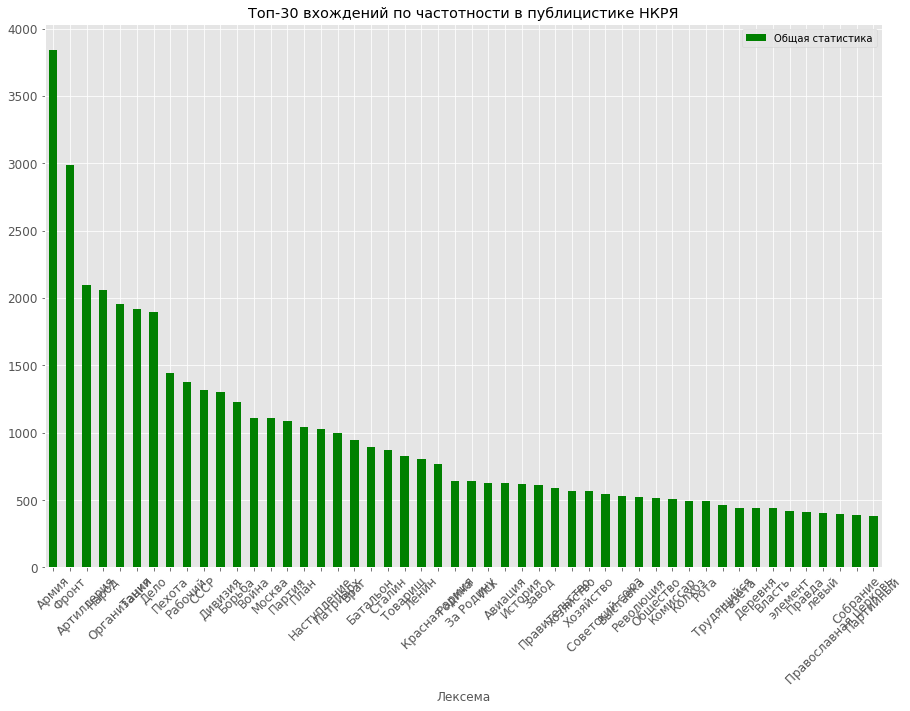

In [202]:
(freq_by_nkrya.sort_values(by=['Общая статистика'], ascending=False)[:50]
 .plot.bar(x='Лексема', y='Общая статистика', rot=45, figsize=(15, 10), grid=True, legend=True, 
           title='Топ-30 вхождений по частотности в публицистике НКРЯ', fontsize=12, color='green'))

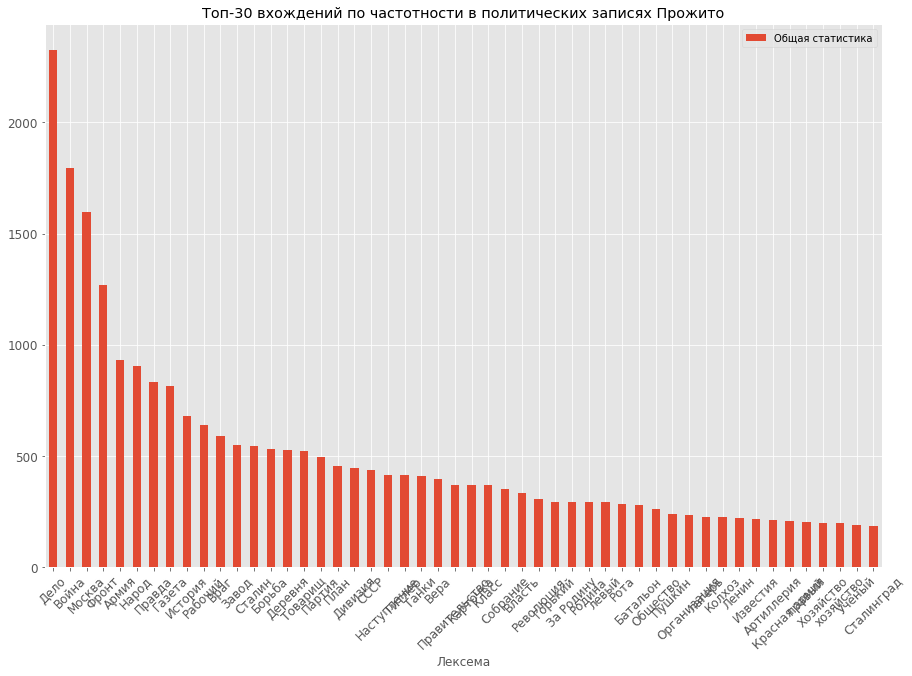

In [200]:
(freq_by_polit_prozhito.sort_values(by=['Общая статистика'], ascending=False)[:50]
 .plot.bar(x='Лексема', y='Общая статистика', rot=45, figsize=(15, 10), grid=True, legend=True, 
           title='Топ-30 вхождений по частотности в политических записях Прожито', fontsize=12))

In [23]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.options.plotting.backend = "plotly"

In [2]:
ngramm_stat = pd.read_excel('ngramm_stat.xlsx', index_col = 0)

In [ ]:
sessions_per_user['sessions_per_user'].plot(title='Число сессий на пользователя в сутки', width=1000, height=500, 
                                            labels=dict(session_date="Дата сессии", 
                                                                value="Количество сессий"))

In [ ]:
def intro(**data):
    print("\nData type of argument: ",type(data))

    for key, value in data.items():
        print("{} is {}".format(key, value))

intro(Firstname="Sita", Lastname="Sharma", Age=22, Phone=1234567890)
intro(Firstname="John", Lastname="Wood", Email="johnwood@nomail.com", Country="Wakanda", Age=25, Phone=9876543210)

In [31]:
freq_by_nkrya[freq_by_nkrya['Лексема'] == 'Авиация']

Лексема      Лемма  Общая статистика       1928      1929        1930  \
0  Авиация   авиация         624.437772  17.123654  12.93293  154.472958   

   1931       1934  1935        1936       1937        1938       1939  \
0   0.0  34.786239   0.0  278.009452  65.544114  156.266986  45.279016   

          1941         1942        1943  1944        1945  1947  1949  1950  \
0  1514.166654  10614.23876  465.714126   0.0  139.341102   0.0   0.0   0.0   

   1951  1952  
0   0.0   0.0

In [32]:
# def freq_by_word(**data):
#     freq_by_word = ngramm_stat[ngramm_stat['Лексема'] == 'Авиация']
#     numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
freq_by_word1 = ngramm_stat[ngramm_stat['Лексема'] == 'Авиация']
freq_by_word1 = freq_by_word.select_dtypes(include=numerics)
freq_by_word1.T.plot(labels=dict(index="Год", value="Количество вхождение на миллион слов"))
freq_by_word = freq_by_nkrya[freq_by_nkrya['Лексема'] == 'Авиация']
freq_by_word = freq_by_word.select_dtypes(include=numerics)
freq_by_word.T.plot(labels=dict(index="Год", value="Количество вхождение на миллион слов"))

In [28]:
freq_by_nkrya = pd.read_excel('freq_by_nkrya.xlsx', index_col=0)

In [29]:
freq_by_nkrya[ngramm_stat['Лексема'] == 'Авиация' ].T[1].plot()

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

AttributeError: 'Line2D' object has no property 'grid'

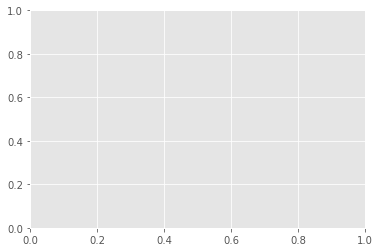

In [77]:
# def intro(**data):
#     print("\nData type of argument: ",type(data))

#     for key, value in data.items():
#         print("{} is {}".format(key, value))

# intro(Firstname="Sita", Lastname="Sharma", Age=22, Phone=1234567890)
# intro(Firstname="John", Lastname="Wood", Email="johnwood@nomail.com", Country="Wakanda", Age=25, Phone=9876543210)
# # def freq_by_word(**data):
#     freq_by_word = ngramm_stat[ngramm_stat['Лексема'] == 'Авиация']
#     numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# freq_by_word1 = ngramm_stat[ngramm_stat['Лексема'] == 'Авиация']
# freq_by_word1 = freq_by_word.select_dtypes(include=numerics)
# freq_by_word1.T.plot(labels=dict(index="Год", value="Количество вхождение на миллион слов"))
# freq_by_word = freq_by_nkrya[freq_by_nkrya['Лексема'] == 'Авиация']
# freq_by_word = freq_by_word.select_dtypes(include=numerics)
# freq_by_word.T.plot(labels=dict(index="Год", value="Количество вхождение на миллион слов"))

from matplotlib import style  # добавляем стили
style.use('ggplot')  # выбираем стиль ggplot
def visualization(lexeme, data**)
    for key, value in data.items():
    freq_by_word = value[value['Лексема'] == lexeme]
    freq_by_word = freq_by_word.select_dtypes(include=numerics)
    plt.plot(freq_by_word.columns.tolist()[1:], freq_by_word.values.tolist()[0][1:], label=key)
#plt.plot(list(bigram_for_years_prozhito.keys()), list(bigram_for_years_prozhito.values()), 'r',label='"Прожито"')
plt.title(lexeme)
plt.ylabel('Количество вхождений')
plt.xlabel('Год')
plt.legend(fontsize=12)
# plt.savefig('троцки_абсолют.png', format='png')

In [318]:
freq_by_pol

Лексема      1928      1929      1930      1931      1932  \
0                аборт  0.974264  0.982664  0.995160  0.973780  0.941802   
1              Авиация  4.821602  4.984004  5.361248  5.725615  6.184901   
2              Австрия  6.252981  5.998025  6.245759  6.248784  6.126916   
3                Агент  6.444720  6.328157  6.322440  6.179085  6.182088   
4             Агитатор  1.839153  1.880772  2.255069  2.518542  2.613663   
..                 ...       ...       ...       ...       ...       ...   
558  Японская военщина  0.022213  0.038450  0.058277  0.154556  0.207320   
559  Японская разведка  0.005577  0.009976  0.009218  0.010654  0.009846   
560    японские шпионы  0.001749  0.001399  0.004784  0.005477  0.006629   
561    японское войско  0.000000  0.000000  0.000905  0.000775  0.001928   
562             Ячейка  6.872194  7.144391  7.237667  6.894754  7.097114   

         1933      1934      1935      1936      1937       1938       1939  \
0    0.985515  0.977251  0.961468  0.999228  0.962573   0.900380   0.826756   
1    6.417238  6.828571  8.046336  8.552724  9.678546  10.342195  12.359070   
2    5.829536  5.720420  5.450628  5.434626  5.226799   5.636750   5.374263   
3    5.795679  5.845293  5.283088  5.103508  4.911117   4.823203   4.760491   
4    2.668530  2.642528  3.093799  3.618215  3.804257   3.713545   6.411498   
..        ...       ...       ...       ...       ...        ...        ...   
558  0.357111  0.482520  0.831643  1.032237  1.066441   0.981778   0.950491   
559  0.008098  0.059925  0.075855  0.083140  0.087453   0.085873   0.090330   
560  0.007260  0.026486  0.032279  0.036488  0.038474   0.039444   0.038292   
561  0.002558  0.003190  0.003914  0.003914  0.003139   0.003139   0.001987   
562  6.806752  6.403673  5.344542  4.450623  3.678667   3.300533   2.579718   

          1940       1941       1942       1943       1944       1945  \
0     0.640542   0.586416   0.542169   0.439602   0.380452   0.381903   
1    14.569672  18.209256  17.275131  16.950190  15.418125  14.063222   
2     6.290360   7.376418   8.000079   7.857750   8.120738   7.580326   
3     5.273037   5.242287   5.204621   5.086857   5.004579   4.910437   
4     9.270634  11.834365  12.373773  12.281745  11.965370  11.984270   
..         ...        ...        ...        ...        ...        ...   
558   0.825831   0.716463   0.464825   0.335003   0.306310   0.302151   
559   0.093039   0.047602   0.039485   0.070679   0.068337   0.069949   
560   0.037661   0.017435   0.014247   0.012866   0.008876   0.007923   
561   0.001356   0.000724   0.000000   0.000000   0.000000   0.000000   
562   2.188816   1.681525   1.475349   1.345582   1.319002   1.229044   

          1946      1947      1948      1949      1950      1951      1952  \
0     0.380187  0.449691  0.482787  0.471039  0.466135  0.479323  0.491126   
1    11.457734  8.862262  4.657872  4.095322  3.491197  3.339102  3.392315   
2     7.966475  7.660575  6.557841  5.729247  5.616696  5.241053  5.218523   
3     4.839018  4.398007  4.411425  4.271754  4.358250  4.356096  4.418403   
4     9.159897  6.516200  4.362786  3.546660  3.282713  3.294129  3.233616   
..         ...       ...       ...       ...       ...       ...       ...   
558   0.292975  0.297804  0.346841  0.266683  0.213787  0.216754  0.238009   
559   0.066836  0.066035  0.063184  0.058250  0.018610  0.018509  0.018311   
560   0.008931  0.012557  0.015704  0.016338  0.017678  0.019343  0.021262   
561   0.001345  0.001707  0.002101  0.002101  0.002101  0.002451  0.002941   
562   1.343635  1.497937  1.573923  1.619464  1.721364  1.655876  1.674924   

         1953           Часть речи  
0    0.492122  имя существительное  
1    3.217769  имя существительное  
2    4.774208  имя существительное  
3    4.391776  имя существительное  
4    3.660340  имя существительное  
..        ...                  ...  
558  0.274568       словосочетание  
559  0.020536       словосочетание  
560  0

In [90]:
freq_by_polit_prozhito = pd.read_excel('freq_by_polit_prozhito.xlsx', index_col=0)
freq_by_nkrya = pd.read_excel('freq_by_nkrya.xlsx', index_col=0)
freq_by_ngramm = pd.read_excel('ngramm_stat.xlsx', index_col=0)

In [ ]:
правый, левый, Пушкин Троцкий Бухарин Лермонтов Гоголь лагерь

In [46]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
from matplotlib import style  # добавляем стили
style.use('ggplot')  # выбираем стиль ggplot
def visualization(lexeme, **data):
    for key, value in data.items():
        freq_by_word = value[value['Лексема'] == lexeme]
        freq_by_word = freq_by_word.select_dtypes(include=numerics)
        plt.plot(freq_by_word.columns.tolist()[1:], freq_by_word.values.tolist()[0][1:], label=key)
    plt.title(lexeme)
    plt.ylabel('Количество вхождений на миллион слов')
    plt.xlabel('Год')
    plt.legend(fontsize=8)
    plt.figure(figsize=(20, 6))
    plt.show()

In [7]:
abs_freq_by_all_prozhito = pd.read_excel('abs_freq_by_all_prozhito.xlsx', index_col = 0)
abs_freq_by_nkrya = pd.read_excel('abs_freq_by_nkrya.xlsx', index_col = 0)
abs_freq_by_polit_prozhito = pd.read_excel('abs_freq_by_prozhito.xlsx', index_col = 0)
freq_by_nkrya = pd.read_excel('freq_by_nkrya.xlsx', index_col = 0)
freq_by_polit_prozhito = pd.read_excel('freq_by_polit_prozhito.xlsx', index_col = 0)
freq_by_all_prozhito = pd.read_excel('freq_by_all_prozhito.xlsx', index_col = 0)
ngramm_stat = pd.read_excel('ngramm_stat.xlsx', index_col = 0)

In [18]:
freq_by_polit_prozhito['Общая статистика'].corr(freq_by_nkrya['Общая статистика'])

0.7316390921819208

In [23]:
pd.read_clipboard()

Общая  статистика  0.731639
0    1928    0.638341       NaN
1    1929    0.529545       NaN
2    1930    0.661419       NaN
3    1931    0.503976       NaN
4    1934    0.690441       NaN
5    1935    0.232116       NaN
6    1936    0.534303       NaN
7    1937    0.645738       NaN
8    1938    0.635562       NaN
9    1939    0.585562       NaN
10   1941    0.423173       NaN
11   1942    0.474340       NaN
12   1943    0.696793       NaN
13   1944    0.492222       NaN
14   1945    0.588956       NaN
15   1947    0.445862       NaN
16   1949    0.529991       NaN
17   1950    0.638166       NaN
18   1951    0.651086       NaN
19   1952    0.575212       NaN

In [25]:
freq_by_polit_prozhito.corrwith(freq_by_nkrya, drop=True, method='pearson')

Общая статистика    0.731639
1928                0.638341
1929                0.529545
1930                0.661419
1931                0.503976
1934                0.690441
1935                0.232116
1936                0.534303
1937                0.645738
1938                0.635562
1939                0.585562
1941                0.423173
1942                0.474340
1943                0.696793
1944                0.492222
1945                0.588956
1947                0.445862
1949                0.529991
1950                0.638166
1951                0.651086
1952                0.575212
dtype: float64

In [9]:
freq_by_polit_prozhito.head()

Лексема       Лемма  Общая статистика       1928       1929       1930  \
0   Авиация    авиация         180.567321   0.000000   0.000000   3.966963   
1   Австрия    австрия          19.248789   3.567415   0.000000   0.000000   
2     Агент      агент          35.077743  64.213474  62.514791  31.735705   
3  Агитатор   агитатор          16.512921   3.567415   4.465342  23.801779   
4  Агитация   агитация          25.306784   3.567415  26.792053  39.669631   

        1931       1932       1933       1934  ...        1944        1945  \
0   0.000000   0.000000  19.804431  58.429742  ...  236.290271  328.099449   
1  12.458420   0.000000   0.000000  79.297508  ...    5.592669   92.496121   
2  53.986487  62.890445  19.804431  62.603295  ...   22.370677   26.178148   
3  20.764033   0.000000   9.902216   4.173553  ...   12.583506   13.961679   
4  20.764033  10.481741  49.511078  25.041318  ...   25.167011   22.687728   

        1946       1947       1948       1949       1950       1951  \
0  61.491161  52.514239  28.658838  11.094592   7.340904  20.540348   
1  21.961129   9.548043   0.000000  11.094592   0.000000   6.846783   
2  35.137806  14.322065  28.658838  33.283777  14.681809  13.693565   
3  39.530032  14.322065  14.329419   0.000000  29.363617  27.387131   
4  52.706709  42.966195  21.494129  11.094592  36.704521   6.846783   

        1952       1953  
0  20.096194  17.213778  
1   6.698731   0.000000  
2   6.698731  22.951704  
3  13.397463  17.213778  
4   0.000000  22.951704  

[5 rows x 29 columns]

In [ ]:
 freq_by_polit_prozhito[key] = freq_by_polit_prozhito['Лемма'].apply(lambda x: ' '.join(flat_politic_notes[key]).count(x) / 
                                                      len(flat_politic_notes[key]) * 1000000)

In [ ]:
правый, левый, Пушкин Троцкий Бухарин Лермонтов Гоголь лагерь

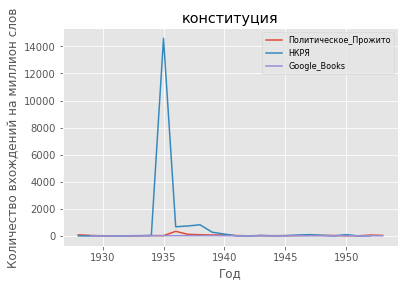

<Figure size 1440x432 with 0 Axes>

In [96]:
visualization('конституция', Политическое_Прожито=freq_by_polit_prozhito, НКРЯ=freq_by_nkrya, Google_Books=ngramm_stat)

In [ ]:
flat_all_prozhito.count(x) / sum(length_all_prozhito) * 1000000

In [29]:
import pandas as pd

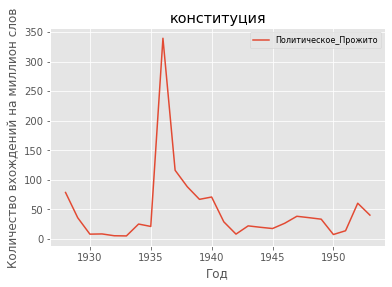

<Figure size 1440x432 with 0 Axes>

In [60]:
visualization('конституция', Политическое_Прожито=freq_by_polit_prozhito, )

In [66]:
freq_by_word

Общая статистика       1928      1929        1930  1931       1934  1935  \
0        624.437772  17.123654  12.93293  154.472958   0.0  34.786239   0.0   

         1936       1937        1938       1939         1941         1942  \
0  278.009452  65.544114  156.266986  45.279016  1514.166654  10614.23876   

         1943  1944        1945  1947  1949  1950  1951  1952  
0  465.714126   0.0  139.341102   0.0   0.0   0.0   0.0   0.0

In [ ]:
stalin_notes_with_lemma = pd.read_excel('stalin_notes_with_lemma.xlsx', index_col=0)

In [274]:
df4 = pd.read_clipboard()

In [283]:
df4.columns

Index(['Год ', 'Число записей'], dtype='object')

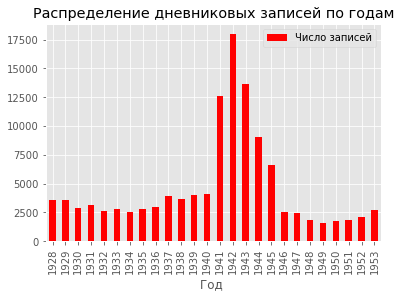

In [286]:
df4.plot.bar(x='Год ', y='Число записей', color='red', title='Распределение дневниковых записей по годам')

In [287]:
df5 = pd.read_clipboard()

In [288]:
df5

ID                                  Автор  Число записей
0     #56              Михаил Михайлович Пришвин           4890
1   #1629          Константин Федорович Измайлов           4695
2    #867             Евгений Евгеньевич Лансере           2142
3    #318              Владимир Афанасьевич Швец           2084
4    #213           Алексей Васильевич Орешников           1897
5    #134            Николай Михайлович Дружинин           1346
6   #1101               Павел Тимофеевич Ананьин           1185
7    #599            Петр Евграфович Ковалевский           1154
8    #476  Варвара Григорьевна Малахиева-Мирович           1105
9    #117                Сергей Иванович Вавилов           1036
10    #21              Елена Сергеевна Булгакова           1021
11  #1664            Илья Иннокентьевич Кузнецов           1016
12   #606                Николай Иванович Кареев            933
13   #482            Ирина Михайловна Дунаевская            920
14   #448       Иван Иннокентьевич Серебренников            913
15    #30               Николай Павлович Горшков            880
16    #25         Всеволод Витальевич Вишневский            856
17   #223              Милица Васильевна Нечкина            814
18   #931             Мария Николаевна Воробьева            805
19   #367         Владимир Алексеевич Порцевский            784

In [252]:
df1 = pd.read_clipboard()

In [263]:
df2 = pd.read_clipboard()

In [267]:
df3 = pd.read_clipboard()

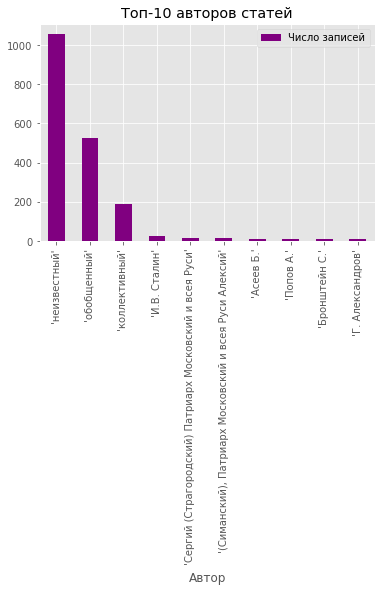

In [273]:
df3.sort_values(by=['Число записей'], ascending=False).plot.bar(x='Автор', y='Число записей', color='purple', title='Топ-10 авторов статей')

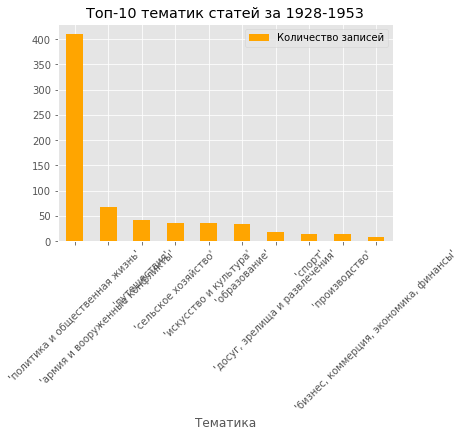

In [268]:
df2.sort_values(by=['Количество записей'], ascending=False).plot.bar(x='Тематика', y='Количество записей', color='orange', title='Топ-10 тематик статей за 1928-1953', rot=45)

In [264]:
df1.sort_values(by=['Количество записей'], ascending=False)[:9].plot.bar(x='Тематика', y='Количество записей', color='orange', title='Топ-10 тематик статей за 1928-1953')

KeyError: 'Тематика'

# Word2vec

In [37]:
from gensim.models.keyedvectors import KeyedVectors

model = KeyedVectors.load_word2vec_format('model.bin', binary=True)

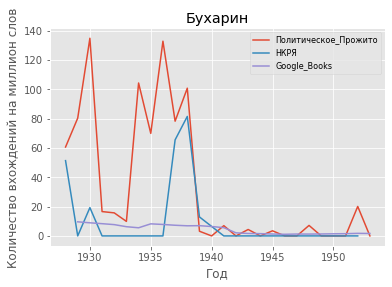

<Figure size 1440x432 with 0 Axes>

In [91]:
visualization('Бухарин', Политическое_Прожито=freq_by_polit_prozhito, НКРЯ=freq_by_nkrya, Google_Books = ngramm_stat)

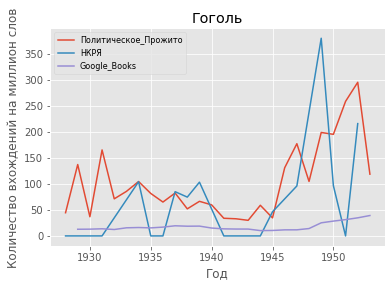

<Figure size 1440x432 with 0 Axes>

In [83]:
visualization('Гоголь', Политическое_Прожито=freq_by_all_prozhito, НКРЯ=freq_by_nkrya, Google_Books = ngramm_stat)

In [87]:
model.wv.most_similar(positive=["дело"])

C:\Users\kryuk\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('вообще', 0.5787124633789062),
 ('работа', 0.5470651388168335),
 ('ничто', 0.5445101261138916),
 ('знать', 0.5440050363540649),
 ('думать', 0.5380104184150696),
 ('вопрос', 0.5206136703491211),
 ('отношение', 0.5113130211830139),
 ('понимать', 0.5006799697875977),
 ('положение', 0.48686960339546204),
 ('должный', 0.4859117865562439)]

In [69]:
model.wv.most_similar(positive=["каменев"])

C:\Users\kryuk\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('зиновьев', 0.44208765029907227),
 ('углановый', 0.3766588568687439),
 ('пятаковый', 0.3598548173904419),
 ('каменеть', 0.35979464650154114),
 ('воронский', 0.3536410629749298),
 ('радек', 0.3504204750061035),
 ('исторически', 0.33777832984924316),
 ('троцкий', 0.33623528480529785),
 ('гардиана', 0.32880139350891113),
 ('контекст', 0.32507598400115967)]

C:\Users\kryuk\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
C:\Users\kryuk\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # This is added back by InteractiveShellApp.init_path()
C:\Users\kryuk\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]
C:\Users\kryuk\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


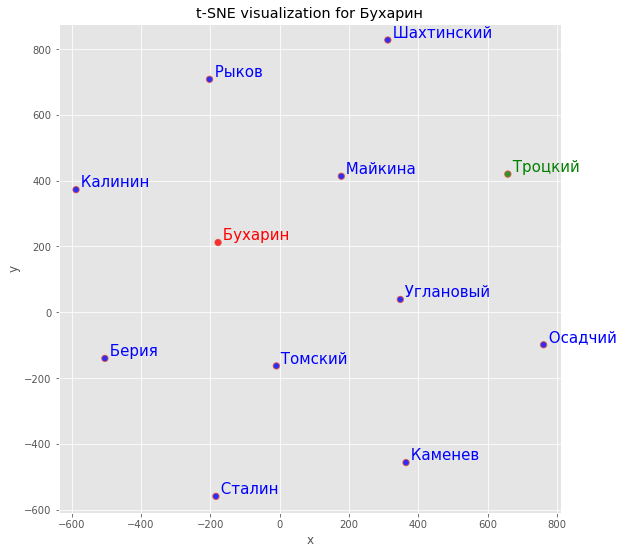

In [57]:
tsne_scatterplot(model, "бухарин", ["троцкий"])

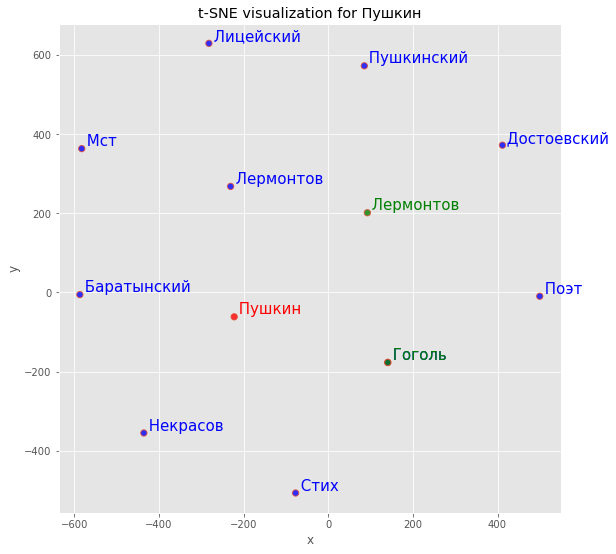

In [205]:
tsne_scatterplot(model, "пушкин", ["лермонтов", "гоголь"])

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
def tsne_scatterplot(model, word, list_names):
    """Plot in seaborn the results from the t-SNE dimensionality reduction 
    algorithm of the vectors of a query word,
    its list of most similar words, and a list of words."""
    vectors_words = [model.wv.word_vec(word)]
    word_labels = [word]
    color_list = ['red']
    close_words = model.wv.most_similar(word)
    for wrd_score in close_words:
        wrd_vector = model.wv.word_vec(wrd_score[0])
        vectors_words.append(wrd_vector)
        word_labels.append(wrd_score[0])
        color_list.append('blue')
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.word_vec(wrd)
        vectors_words.append(wrd_vector)
        word_labels.append(wrd)
        color_list.append('green')
    # t-SNE reduction
    Y = (TSNE(n_components=2, random_state=0, perplexity=15, init="pca")
        .fit_transform(vectors_words))
    # Sets everything up to plot
    df = pd.DataFrame({"x": [x for x in Y[:, 0]],
                    "y": [y for y in Y[:, 1]],
                    "words": word_labels,
                    "color": color_list})
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    # Basic plot
    p1 = sns.regplot(data=df,
                    x="x",
                    y="y",
                    fit_reg=False,
                    marker="o",
                    scatter_kws={"s": 40,
                                "facecolors": df["color"]}
    )
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
        p1.text(df["x"][line],
                df["y"][line],
                " " + df["words"][line].title(),
                horizontalalignment="left",
                verticalalignment="bottom", size="medium",
                color=df["color"][line],
                weight="normal"
        ).set_size(15)
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
    plt.title('t-SNE visualization for {}'.format(word.title()))

# Попытки кластеризации

In [120]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans, AgglomerativeClustering
import pickle
import gensim
import matplotlib
%matplotlib inline

In [112]:
pymorphy_notes = pd.read_excel('stalin_notes_pymorphy.xlsx', index_col=0)

In [117]:
pymorphy_notes = pymorphy_notes.loc[pymorphy_notes['Политическое'] == "['да']"]

In [136]:
pymorphy_notes.head()

Текст       Дата  \
0  ...А мы все шебаршим. На выставке печати в Кел... 1928-01-01   
1  Воскресенье. Погода ясная и очень морозная. Вч... 1928-01-01   
2  Отъезд во Фрейбург. Встали бодро в семь, в вос... 1928-01-01   
4  **[*Текст*** ***дневников*** ***за*** ***1928*... 1928-01-01   
5  Ннеділя. Ради Нового року писав одповідь Груше... 1928-01-01   

                            Автор Политическое  \
0              Иван Иванович Шитц       ['да']   
1  Анатолий  Федорович Стародубов       ['да']   
2      Сергей Сергеевич Прокофьев       ['да']   
4     Василий Алексеевич Городцов       ['да']   
5   Сергій Олександрович Єфремов        ['да']   

                                   Леммы (pymorphy2)   Год  
0  шебаршить выставка печать кёльн отбить хороший...  1928  
1  воскресение погода ясный морозный вчера законч...  1928  
2  отъезд фрейбург встать бодро вокзал полчаса от...  1928  
4  дневник воспроизвести автор сохраниться выписк...  1928  
5  ннеділь ради новый рок писать одповідь грушевс...  1928

In [141]:
pymorphy_notes['Текст'][1]

'Воскресенье. Погода ясная и очень морозная. Вчера закончил роман Магра «Присцилла из Александрии». Книга яркая и своеобразная. Особенно оттеняет ее экзотичность описание зноя и ярких красок Египетской природы. Интересна и сама героиня, редкое сочетание красоты тела и ума.'

In [135]:
pymorphy_notes['Год'] = pymorphy_notes['Дата'].dt.year

C:\Users\kryuk\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [101]:
pymorphy_notes_dict = pymorphy_notes[['Год', 'Леммы (pymorphy2)']]

NameError: name 'pymorphy_notes' is not defined

In [140]:
pymorphy_notes_dict.T.head()

0       \
Год                                                             1928   
Леммы (pymorphy2)  шебаршить выставка печать кёльн отбить хороший...   

                                                              1       \
Год                                                             1928   
Леммы (pymorphy2)  воскресение погода ясный морозный вчера законч...   

                                                              2       \
Год                                                             1928   
Леммы (pymorphy2)  отъезд фрейбург встать бодро вокзал полчаса от...   

                                                              4       \
Год                                                             1928   
Леммы (pymorphy2)  дневник воспроизвести автор сохраниться выписк...   

                                                              5       \
Год                                                             1928   
Леммы (pymorphy2)  ннеділь ради новый рок писать одповідь грушевс...   

                                                              6       \
Год                                                             1928   
Леммы (pymorphy2)  осло письмо т. щепкиной-куперник новый книжечк...   

                                                              7       \
Год                                                             1928   
Леммы (pymorphy2)  конспект иван алексеевич написать почерк вероя...   

                                                              8       \
Год                                                             1928   
Леммы (pymorphy2)  янв дек франция новый чувствовать новый идти в...   

                                                              9       \
Год                                                             1928   
Леммы (pymorphy2)  делать доклад историко-этнологический отдел вн...   

                                                              10      ...  \
Год                                                             1928  ...   
Леммы (pymorphy2)  сделать начать роман гидроцентраль глава конче...  ...   

                                                              119383  \
Год                                                             1953   
Леммы (pymorphy2)  думать перебелить решить механический переписы...   

                                                              119384  \
Год                                                             1953   
Леммы (pymorphy2)  николина гора ребята украшать ёлка бухаров ёлк...   

                                                              119385  \
Год                                                             1953   
Леммы (pymorphy2)  новый встречать ива пригласить нэля трофимов ч...   

                                                              119386  \
Год                                                             1953   
Леммы (pymorphy2)  четверг отдыхать главный образ читать й расска...   

                                                              119387  \
Год                                                             1953   
Леммы (pymorphy2)  никаха мхат плод просвещение вещь хороший весё...   

                                                              119388  \
Год                                                             1953   
Леммы (pymorphy2)  ноябрь декабрь дата алла л. отношение восстано...   

                                                              119389  \
Год                                                             1953   
Леммы (pymorphy2)  ноябрь декабрь дата известие практика корректо...   

                                                              119390  \
Год                                                             1953   
Леммы (pymorphy2)  ноябрь декабрь дата стоять очередь мясо столпо...   

                                                              119391  \
Год                                                             1953 

In [ ]:
area_dict = dict(zip(lakes.area, lakes.count))

In [142]:
d = dict()
d[1928] = pymorphy_notes_dict.loc[pymorphy_notes_dict['Год'] == 1928]['Леммы (pymorphy2)']

In [150]:
d[1928][1]

'воскресение погода ясный морозный вчера закончить роман магра присцилл александрия книга яркий своеобразный оттенять экзотичность описание зной яркий краска египетский природа интересный героиня редкий сочетание красота тело ум'

In [146]:
print([i for i in range(1928, 1954)])

[1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953]


In [100]:
pymorphy_notes_dict_by_years = {key: list(pymorphy_notes_dict.loc[pymorphy_notes_dict['Год'] == key]['Леммы (pymorphy2)'])
                                for key in range(1928, 1954)}

NameError: name 'pymorphy_notes_dict' is not defined

In [153]:
pymorphy_notes_dict_by_years[1930]

['январь начаться мясо-заготовка издать приказ право гражданин резать молодняк свинья-кабан вес маленький пуд свинья матка резать начаться запись соз говорить собрание добровольно дело больший давление слово никто говорить собрание соз коллектив ходить ожидать чечен бояться прийдутый пострелять сичас как-бы чивый ожидать смутный',
 'приехать вчера нью-йорк выполнить формальность отправиться задержать комната отель нью-йорк как-то состариться европа простоять вероятно скоро сломать стейнвеять приятно подтянуться пташка устать болеть голова новый нигде собираться встречать ночь погулять бродвей заполнить отказ праздничный толпа свистеть свистулька пищать пищалка хлопать хлопушка невероятный вавилон своеобразный большой эффект число завтракать ольга самаров дело ограничиться пташка раскислый пароход качать настроение заниматься концерт нью-йорк ’ надлежать привести порядок',
 'новый встретить сани дорога квартира серебряков прилагаться вырезка стихотворение демьян бедный новый барон мюнхг

In [122]:
political_notes = list(pymorphy_notes['Леммы (pymorphy2)'])

In [128]:
political_notes = [word_tokenize(str(note)) for note in political_notes]

In [130]:
with open('political_notes.pickle', 'wb') as f:
    pickle.dump(political_notes, f, protocol=2)

In [ ]:
pymorphy_notes['Леммы (pymorphy2)']

In [ ]:
stalin_notes_with_lemma.head()

In [121]:
topics_by_year = data.groupby(['year']).mean()
umap_by_year = get_umap_representation(topics_by_year)

NameError: name 'data' is not defined

# Обучение word2vec модели

In [131]:
from gensim.models import Word2Vec
w2v_model = Word2Vec(
    min_count=10,
    window=2,
    size=300,
    negative=10,
    alpha=0.03,
    min_alpha=0.0007,
    sample=6e-5,
    sg=1)

In [133]:
w2v_model.build_vocab(political_notes)

In [134]:
len(w2v_model.wv.vocab)

45234

In [ ]:
w2v_model.train(data, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)